# Task 1: Classification

- Create a Neural Network model
- Define optimization procedure
- Train Classifier
- Evaluate model on test set

In [1]:

import os
import sys
import json

import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
import torchvision
from torchvision import datasets, transforms
import matplotlib.pyplot as plt
import numpy as np
from utils import NoisyFashionMNIST
from torch.optim.lr_scheduler import StepLR

%matplotlib inline
def show(img):
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1,2,0)), interpolation='nearest')

## Dataset

In [2]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

transform=transforms.Compose([
        transforms.ToTensor()])

train_dataset = datasets.FashionMNIST("./data", train = True, download=True, transform=transform)
test_dataset = datasets.FashionMNIST("./data", train = False, download=True, transform=transform)
print(len(train_dataset))
print(len(test_dataset))


idx_to_class = {v: k for k, v in train_dataset.class_to_idx.items()}

60000
10000


In [3]:
x,y = train_dataset[1]
idx_to_class[y]

'T-shirt/top'

['Ankle boot', 'T-shirt/top', 'T-shirt/top', 'Dress', 'T-shirt/top', 'Pullover', 'Sneaker', 'Pullover', 'Sandal', 'Sandal']


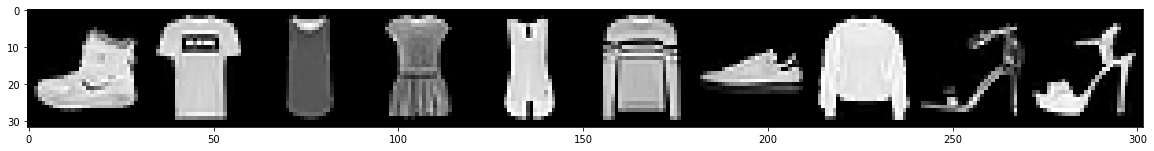

In [4]:
x = [train_dataset[i][0] for i in range(10)]
labels = [idx_to_class[train_dataset[i][1]] for i in range(10)]
print(labels)

plt.figure(figsize=(20,10))
show(torchvision.utils.make_grid(x, nrow=10))
plt.show()

In [5]:
class NeuralNetwork(nn.Module):
    def __init__(self):
        super(NeuralNetwork, self).__init__()
        self.conv1 = nn.Conv2d(1, 6, 5, 1)
        self.conv2 = nn.Conv2d(6, 12, 5, 1)
        self.fc1 = nn.Linear(1200, 60)
        self.fc2 = nn.Linear(60, 10)
      
        
    def forward(self, x):
        x = F.relu(self.conv1(x))
        print(x.size())
        x = F.relu(self.conv2(x))
        print(x.size())
        x = F.max_pool2d(x, 2)
        print(x.size())
        x = torch.flatten(x, 1)
        print(x.size())
        x = F.relu(self.fc1(x))
        print(x.size())
        x = self.fc2(x)
        print(x.size())
        x = F.log_softmax(x, dim=1)   
        print(x.size())
        return x
        

In [6]:
def train(model, device, train_loader, optimizer, epoch):
    model.train()
    for batch_idx, (inputs, labels) in enumerate(train_loader):
        inputs, labels = inputs.to(device), labels.to(device)
        # zero the parameter gradients
        optimizer.zero_grad()
        # forward + backward + optimize
        outputs = model(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()
        
        if batch_idx % 10 == 0:
            print('Train Epoch: {} [{}/{} ({:.0f}%)]\tLoss: {:.6f}'.
                  format(epoch, batch_idx * len(inputs), len(train_loader.dataset),
                100. * batch_idx / len(train_loader), loss.item()), end='\r')



def test(model, device, test_loader):
    model.eval()
    test_loss = 0
    correct = 0
    with torch.no_grad():
        for inputs, labels in test_loader:
            inputs, labels = inputs.to(device), labels.to(device)
            outputs = model(inputs)
            test_loss += criterion(outputs, labels).item()  # sum up batch loss
            pred = outputs.argmax(dim=1, keepdim=True)  # get the index of the max log-probability
            correct += pred.eq(labels.view_as(pred)).sum().item()
           

    test_loss /= len(test_loader.dataset)
    correct /= len(test_loader.dataset)
    print('\nTest set: Average loss: {:.4f}, Accuracy: {}/{} ({:.0f}%)\n'.format(
    test_loss, correct, len(test_loader.dataset),
    100. * correct), end='\r')
#     print(correct)

In [7]:
train_loader = torch.utils.data.DataLoader(train_dataset, batch_size=64)
test_loader = torch.utils.data.DataLoader(test_dataset,  batch_size=64)

model = NeuralNetwork().to(device)
optimizer = optim.Adam(model.parameters(), lr=0.001)
criterion = nn.CrossEntropyLoss()
scheduler = StepLR(optimizer, step_size=5, gamma=0.1)

for epoch in range(1,6):
    train(model, device, train_loader, optimizer, epoch)
    test(model, device, test_loader)
    scheduler.step()

torch.Size([64, 6, 24, 24])
torch.Size([64, 12, 20, 20])
torch.Size([64, 12, 10, 10])
torch.Size([64, 1200])
torch.Size([64, 60])
torch.Size([64, 10])
torch.Size([64, 10])
torch.Size([64, 6, 24, 24]))]	Loss: 2.319706
torch.Size([64, 12, 20, 20])
torch.Size([64, 12, 10, 10])
torch.Size([64, 1200])
torch.Size([64, 60])
torch.Size([64, 10])
torch.Size([64, 10])
torch.Size([64, 6, 24, 24])
torch.Size([64, 12, 20, 20])
torch.Size([64, 12, 10, 10])
torch.Size([64, 1200])
torch.Size([64, 60])
torch.Size([64, 10])
torch.Size([64, 10])
torch.Size([64, 6, 24, 24])
torch.Size([64, 12, 20, 20])
torch.Size([64, 12, 10, 10])
torch.Size([64, 1200])
torch.Size([64, 60])
torch.Size([64, 10])
torch.Size([64, 10])
torch.Size([64, 6, 24, 24])
torch.Size([64, 12, 20, 20])
torch.Size([64, 12, 10, 10])
torch.Size([64, 1200])
torch.Size([64, 60])
torch.Size([64, 10])
torch.Size([64, 10])
torch.Size([64, 6, 24, 24])
torch.Size([64, 12, 20, 20])
torch.Size([64, 12, 10, 10])
torch.Size([64, 1200])
torch.Size([64

torch.Size([64, 12, 20, 20])
torch.Size([64, 12, 10, 10])
torch.Size([64, 1200])
torch.Size([64, 60])
torch.Size([64, 10])
torch.Size([64, 10])
torch.Size([64, 6, 24, 24])
torch.Size([64, 12, 20, 20])
torch.Size([64, 12, 10, 10])
torch.Size([64, 1200])
torch.Size([64, 60])
torch.Size([64, 10])
torch.Size([64, 10])
torch.Size([64, 6, 24, 24])
torch.Size([64, 12, 20, 20])
torch.Size([64, 12, 10, 10])
torch.Size([64, 1200])
torch.Size([64, 60])
torch.Size([64, 10])
torch.Size([64, 10])
torch.Size([64, 6, 24, 24])
torch.Size([64, 12, 20, 20])
torch.Size([64, 12, 10, 10])
torch.Size([64, 1200])
torch.Size([64, 60])
torch.Size([64, 10])
torch.Size([64, 10])
torch.Size([64, 6, 24, 24])
torch.Size([64, 12, 20, 20])
torch.Size([64, 12, 10, 10])
torch.Size([64, 1200])
torch.Size([64, 60])
torch.Size([64, 10])
torch.Size([64, 10])
torch.Size([64, 6, 24, 24])
torch.Size([64, 12, 20, 20])
torch.Size([64, 12, 10, 10])
torch.Size([64, 1200])
torch.Size([64, 60])
torch.Size([64, 10])
torch.Size([64, 1

torch.Size([64, 12, 20, 20])
torch.Size([64, 12, 10, 10])
torch.Size([64, 1200])
torch.Size([64, 60])
torch.Size([64, 10])
torch.Size([64, 10])
torch.Size([64, 6, 24, 24])
torch.Size([64, 12, 20, 20])
torch.Size([64, 12, 10, 10])
torch.Size([64, 1200])
torch.Size([64, 60])
torch.Size([64, 10])
torch.Size([64, 10])
torch.Size([64, 6, 24, 24])
torch.Size([64, 12, 20, 20])
torch.Size([64, 12, 10, 10])
torch.Size([64, 1200])
torch.Size([64, 60])
torch.Size([64, 10])
torch.Size([64, 10])
torch.Size([64, 6, 24, 24])
torch.Size([64, 12, 20, 20])
torch.Size([64, 12, 10, 10])
torch.Size([64, 1200])
torch.Size([64, 60])
torch.Size([64, 10])
torch.Size([64, 10])
torch.Size([64, 6, 24, 24])
torch.Size([64, 12, 20, 20])
torch.Size([64, 12, 10, 10])
torch.Size([64, 1200])
torch.Size([64, 60])
torch.Size([64, 10])
torch.Size([64, 10])
torch.Size([64, 6, 24, 24])
torch.Size([64, 12, 20, 20])
torch.Size([64, 12, 10, 10])
torch.Size([64, 1200])
torch.Size([64, 60])
torch.Size([64, 10])
torch.Size([64, 1

torch.Size([64, 12, 20, 20])
torch.Size([64, 12, 10, 10])
torch.Size([64, 1200])
torch.Size([64, 60])
torch.Size([64, 10])
torch.Size([64, 10])
torch.Size([64, 6, 24, 24])
torch.Size([64, 12, 20, 20])
torch.Size([64, 12, 10, 10])
torch.Size([64, 1200])
torch.Size([64, 60])
torch.Size([64, 10])
torch.Size([64, 10])
torch.Size([64, 6, 24, 24])
torch.Size([64, 12, 20, 20])
torch.Size([64, 12, 10, 10])
torch.Size([64, 1200])
torch.Size([64, 60])
torch.Size([64, 10])
torch.Size([64, 10])
torch.Size([64, 6, 24, 24])
torch.Size([64, 12, 20, 20])
torch.Size([64, 12, 10, 10])
torch.Size([64, 1200])
torch.Size([64, 60])
torch.Size([64, 10])
torch.Size([64, 10])
torch.Size([64, 6, 24, 24])
torch.Size([64, 12, 20, 20])
torch.Size([64, 12, 10, 10])
torch.Size([64, 1200])
torch.Size([64, 60])
torch.Size([64, 10])
torch.Size([64, 10])
torch.Size([64, 6, 24, 24])
torch.Size([64, 12, 20, 20])
torch.Size([64, 12, 10, 10])
torch.Size([64, 1200])
torch.Size([64, 60])
torch.Size([64, 10])
torch.Size([64, 1

torch.Size([64, 12, 20, 20])
torch.Size([64, 12, 10, 10])
torch.Size([64, 1200])
torch.Size([64, 60])
torch.Size([64, 10])
torch.Size([64, 10])
torch.Size([64, 6, 24, 24])
torch.Size([64, 12, 20, 20])
torch.Size([64, 12, 10, 10])
torch.Size([64, 1200])
torch.Size([64, 60])
torch.Size([64, 10])
torch.Size([64, 10])
torch.Size([64, 6, 24, 24])
torch.Size([64, 12, 20, 20])
torch.Size([64, 12, 10, 10])
torch.Size([64, 1200])
torch.Size([64, 60])
torch.Size([64, 10])
torch.Size([64, 10])
torch.Size([64, 6, 24, 24])
torch.Size([64, 12, 20, 20])
torch.Size([64, 12, 10, 10])
torch.Size([64, 1200])
torch.Size([64, 60])
torch.Size([64, 10])
torch.Size([64, 10])
torch.Size([64, 6, 24, 24])
torch.Size([64, 12, 20, 20])
torch.Size([64, 12, 10, 10])
torch.Size([64, 1200])
torch.Size([64, 60])
torch.Size([64, 10])
torch.Size([64, 10])
torch.Size([64, 6, 24, 24])
torch.Size([64, 12, 20, 20])
torch.Size([64, 12, 10, 10])
torch.Size([64, 1200])
torch.Size([64, 60])
torch.Size([64, 10])
torch.Size([64, 1

torch.Size([64, 12, 20, 20])
torch.Size([64, 12, 10, 10])
torch.Size([64, 1200])
torch.Size([64, 60])
torch.Size([64, 10])
torch.Size([64, 10])
torch.Size([64, 6, 24, 24])
torch.Size([64, 12, 20, 20])
torch.Size([64, 12, 10, 10])
torch.Size([64, 1200])
torch.Size([64, 60])
torch.Size([64, 10])
torch.Size([64, 10])
torch.Size([64, 6, 24, 24])
torch.Size([64, 12, 20, 20])
torch.Size([64, 12, 10, 10])
torch.Size([64, 1200])
torch.Size([64, 60])
torch.Size([64, 10])
torch.Size([64, 10])
torch.Size([64, 6, 24, 24])
torch.Size([64, 12, 20, 20])
torch.Size([64, 12, 10, 10])
torch.Size([64, 1200])
torch.Size([64, 60])
torch.Size([64, 10])
torch.Size([64, 10])
torch.Size([64, 6, 24, 24])
torch.Size([64, 12, 20, 20])
torch.Size([64, 12, 10, 10])
torch.Size([64, 1200])
torch.Size([64, 60])
torch.Size([64, 10])
torch.Size([64, 10])
torch.Size([64, 6, 24, 24])
torch.Size([64, 12, 20, 20])
torch.Size([64, 12, 10, 10])
torch.Size([64, 1200])
torch.Size([64, 60])
torch.Size([64, 10])
torch.Size([64, 1

torch.Size([64, 12, 20, 20])
torch.Size([64, 12, 10, 10])
torch.Size([64, 1200])
torch.Size([64, 60])
torch.Size([64, 10])
torch.Size([64, 10])
torch.Size([64, 6, 24, 24])
torch.Size([64, 12, 20, 20])
torch.Size([64, 12, 10, 10])
torch.Size([64, 1200])
torch.Size([64, 60])
torch.Size([64, 10])
torch.Size([64, 10])
torch.Size([64, 6, 24, 24])
torch.Size([64, 12, 20, 20])
torch.Size([64, 12, 10, 10])
torch.Size([64, 1200])
torch.Size([64, 60])
torch.Size([64, 10])
torch.Size([64, 10])
torch.Size([64, 6, 24, 24])
torch.Size([64, 12, 20, 20])
torch.Size([64, 12, 10, 10])
torch.Size([64, 1200])
torch.Size([64, 60])
torch.Size([64, 10])
torch.Size([64, 10])
torch.Size([64, 6, 24, 24])
torch.Size([64, 12, 20, 20])
torch.Size([64, 12, 10, 10])
torch.Size([64, 1200])
torch.Size([64, 60])
torch.Size([64, 10])
torch.Size([64, 10])
torch.Size([64, 6, 24, 24])
torch.Size([64, 12, 20, 20])
torch.Size([64, 12, 10, 10])
torch.Size([64, 1200])
torch.Size([64, 60])
torch.Size([64, 10])
torch.Size([64, 1

torch.Size([64, 10])
torch.Size([64, 6, 24, 24])
torch.Size([64, 12, 20, 20])
torch.Size([64, 12, 10, 10])
torch.Size([64, 1200])
torch.Size([64, 60])
torch.Size([64, 10])
torch.Size([64, 10])
torch.Size([64, 6, 24, 24])
torch.Size([64, 12, 20, 20])
torch.Size([64, 12, 10, 10])
torch.Size([64, 1200])
torch.Size([64, 60])
torch.Size([64, 10])
torch.Size([64, 10])
torch.Size([64, 6, 24, 24])
torch.Size([64, 12, 20, 20])
torch.Size([64, 12, 10, 10])
torch.Size([64, 1200])
torch.Size([64, 60])
torch.Size([64, 10])
torch.Size([64, 10])
torch.Size([64, 6, 24, 24])
torch.Size([64, 12, 20, 20])
torch.Size([64, 12, 10, 10])
torch.Size([64, 1200])
torch.Size([64, 60])
torch.Size([64, 10])
torch.Size([64, 10])
torch.Size([64, 6, 24, 24])
torch.Size([64, 12, 20, 20])
torch.Size([64, 12, 10, 10])
torch.Size([64, 1200])
torch.Size([64, 60])
torch.Size([64, 10])
torch.Size([64, 10])
torch.Size([64, 6, 24, 24]) (41%)]	Loss: 0.554237
torch.Size([64, 12, 20, 20])
torch.Size([64, 12, 10, 10])
torch.Size(

torch.Size([64, 12, 20, 20])
torch.Size([64, 12, 10, 10])
torch.Size([64, 1200])
torch.Size([64, 60])
torch.Size([64, 10])
torch.Size([64, 10])
torch.Size([64, 6, 24, 24])
torch.Size([64, 12, 20, 20])
torch.Size([64, 12, 10, 10])
torch.Size([64, 1200])
torch.Size([64, 60])
torch.Size([64, 10])
torch.Size([64, 10])
torch.Size([64, 6, 24, 24])
torch.Size([64, 12, 20, 20])
torch.Size([64, 12, 10, 10])
torch.Size([64, 1200])
torch.Size([64, 60])
torch.Size([64, 10])
torch.Size([64, 10])
torch.Size([64, 6, 24, 24])
torch.Size([64, 12, 20, 20])
torch.Size([64, 12, 10, 10])
torch.Size([64, 1200])
torch.Size([64, 60])
torch.Size([64, 10])
torch.Size([64, 10])
torch.Size([64, 6, 24, 24])
torch.Size([64, 12, 20, 20])
torch.Size([64, 12, 10, 10])
torch.Size([64, 1200])
torch.Size([64, 60])
torch.Size([64, 10])
torch.Size([64, 10])
torch.Size([64, 6, 24, 24])
torch.Size([64, 12, 20, 20])
torch.Size([64, 12, 10, 10])
torch.Size([64, 1200])
torch.Size([64, 60])
torch.Size([64, 10])
torch.Size([64, 1

torch.Size([64, 12, 20, 20])
torch.Size([64, 12, 10, 10])
torch.Size([64, 1200])
torch.Size([64, 60])
torch.Size([64, 10])
torch.Size([64, 10])
torch.Size([64, 6, 24, 24])
torch.Size([64, 12, 20, 20])
torch.Size([64, 12, 10, 10])
torch.Size([64, 1200])
torch.Size([64, 60])
torch.Size([64, 10])
torch.Size([64, 10])
torch.Size([64, 6, 24, 24])
torch.Size([64, 12, 20, 20])
torch.Size([64, 12, 10, 10])
torch.Size([64, 1200])
torch.Size([64, 60])
torch.Size([64, 10])
torch.Size([64, 10])
torch.Size([64, 6, 24, 24]) (51%)]	Loss: 0.487923
torch.Size([64, 12, 20, 20])
torch.Size([64, 12, 10, 10])
torch.Size([64, 1200])
torch.Size([64, 60])
torch.Size([64, 10])
torch.Size([64, 10])
torch.Size([64, 6, 24, 24])
torch.Size([64, 12, 20, 20])
torch.Size([64, 12, 10, 10])
torch.Size([64, 1200])
torch.Size([64, 60])
torch.Size([64, 10])
torch.Size([64, 10])
torch.Size([64, 6, 24, 24])
torch.Size([64, 12, 20, 20])
torch.Size([64, 12, 10, 10])
torch.Size([64, 1200])
torch.Size([64, 60])
torch.Size([64, 

torch.Size([64, 12, 20, 20])
torch.Size([64, 12, 10, 10])
torch.Size([64, 1200])
torch.Size([64, 60])
torch.Size([64, 10])
torch.Size([64, 10])
torch.Size([64, 6, 24, 24])
torch.Size([64, 12, 20, 20])
torch.Size([64, 12, 10, 10])
torch.Size([64, 1200])
torch.Size([64, 60])
torch.Size([64, 10])
torch.Size([64, 10])
torch.Size([64, 6, 24, 24])
torch.Size([64, 12, 20, 20])
torch.Size([64, 12, 10, 10])
torch.Size([64, 1200])
torch.Size([64, 60])
torch.Size([64, 10])
torch.Size([64, 10])
torch.Size([64, 6, 24, 24])
torch.Size([64, 12, 20, 20])
torch.Size([64, 12, 10, 10])
torch.Size([64, 1200])
torch.Size([64, 60])
torch.Size([64, 10])
torch.Size([64, 10])
torch.Size([64, 6, 24, 24])
torch.Size([64, 12, 20, 20])
torch.Size([64, 12, 10, 10])
torch.Size([64, 1200])
torch.Size([64, 60])
torch.Size([64, 10])
torch.Size([64, 10])
torch.Size([64, 6, 24, 24]) (58%)]	Loss: 0.496257
torch.Size([64, 12, 20, 20])
torch.Size([64, 12, 10, 10])
torch.Size([64, 1200])
torch.Size([64, 60])
torch.Size([64, 

torch.Size([64, 12, 20, 20])
torch.Size([64, 12, 10, 10])
torch.Size([64, 1200])
torch.Size([64, 60])
torch.Size([64, 10])
torch.Size([64, 10])
torch.Size([64, 6, 24, 24])
torch.Size([64, 12, 20, 20])
torch.Size([64, 12, 10, 10])
torch.Size([64, 1200])
torch.Size([64, 60])
torch.Size([64, 10])
torch.Size([64, 10])
torch.Size([64, 6, 24, 24])
torch.Size([64, 12, 20, 20])
torch.Size([64, 12, 10, 10])
torch.Size([64, 1200])
torch.Size([64, 60])
torch.Size([64, 10])
torch.Size([64, 10])
torch.Size([64, 6, 24, 24])
torch.Size([64, 12, 20, 20])
torch.Size([64, 12, 10, 10])
torch.Size([64, 1200])
torch.Size([64, 60])
torch.Size([64, 10])
torch.Size([64, 10])
torch.Size([64, 6, 24, 24]) (63%)]	Loss: 0.305094
torch.Size([64, 12, 20, 20])
torch.Size([64, 12, 10, 10])
torch.Size([64, 1200])
torch.Size([64, 60])
torch.Size([64, 10])
torch.Size([64, 10])
torch.Size([64, 6, 24, 24])
torch.Size([64, 12, 20, 20])
torch.Size([64, 12, 10, 10])
torch.Size([64, 1200])
torch.Size([64, 60])
torch.Size([64, 

torch.Size([64, 1200])
torch.Size([64, 60])
torch.Size([64, 10])
torch.Size([64, 10])
torch.Size([64, 6, 24, 24])
torch.Size([64, 12, 20, 20])
torch.Size([64, 12, 10, 10])
torch.Size([64, 1200])
torch.Size([64, 60])
torch.Size([64, 10])
torch.Size([64, 10])
torch.Size([64, 6, 24, 24]) (68%)]	Loss: 0.491876
torch.Size([64, 12, 20, 20])
torch.Size([64, 12, 10, 10])
torch.Size([64, 1200])
torch.Size([64, 60])
torch.Size([64, 10])
torch.Size([64, 10])
torch.Size([64, 6, 24, 24])
torch.Size([64, 12, 20, 20])
torch.Size([64, 12, 10, 10])
torch.Size([64, 1200])
torch.Size([64, 60])
torch.Size([64, 10])
torch.Size([64, 10])
torch.Size([64, 6, 24, 24])
torch.Size([64, 12, 20, 20])
torch.Size([64, 12, 10, 10])
torch.Size([64, 1200])
torch.Size([64, 60])
torch.Size([64, 10])
torch.Size([64, 10])
torch.Size([64, 6, 24, 24])
torch.Size([64, 12, 20, 20])
torch.Size([64, 12, 10, 10])
torch.Size([64, 1200])
torch.Size([64, 60])
torch.Size([64, 10])
torch.Size([64, 10])
torch.Size([64, 6, 24, 24])
torc

torch.Size([64, 12, 20, 20])
torch.Size([64, 12, 10, 10])
torch.Size([64, 1200])
torch.Size([64, 60])
torch.Size([64, 10])
torch.Size([64, 10])
torch.Size([64, 6, 24, 24])
torch.Size([64, 12, 20, 20])
torch.Size([64, 12, 10, 10])
torch.Size([64, 1200])
torch.Size([64, 60])
torch.Size([64, 10])
torch.Size([64, 10])
torch.Size([64, 6, 24, 24])
torch.Size([64, 12, 20, 20])
torch.Size([64, 12, 10, 10])
torch.Size([64, 1200])
torch.Size([64, 60])
torch.Size([64, 10])
torch.Size([64, 10])
torch.Size([64, 6, 24, 24])
torch.Size([64, 12, 20, 20])
torch.Size([64, 12, 10, 10])
torch.Size([64, 1200])
torch.Size([64, 60])
torch.Size([64, 10])
torch.Size([64, 10])
torch.Size([64, 6, 24, 24])
torch.Size([64, 12, 20, 20])
torch.Size([64, 12, 10, 10])
torch.Size([64, 1200])
torch.Size([64, 60])
torch.Size([64, 10])
torch.Size([64, 10])
torch.Size([64, 6, 24, 24])
torch.Size([64, 12, 20, 20])
torch.Size([64, 12, 10, 10])
torch.Size([64, 1200])
torch.Size([64, 60])
torch.Size([64, 10])
torch.Size([64, 1

torch.Size([64, 12, 20, 20])
torch.Size([64, 12, 10, 10])
torch.Size([64, 1200])
torch.Size([64, 60])
torch.Size([64, 10])
torch.Size([64, 10])
torch.Size([64, 6, 24, 24])
torch.Size([64, 12, 20, 20])
torch.Size([64, 12, 10, 10])
torch.Size([64, 1200])
torch.Size([64, 60])
torch.Size([64, 10])
torch.Size([64, 10])
torch.Size([64, 6, 24, 24])
torch.Size([64, 12, 20, 20])
torch.Size([64, 12, 10, 10])
torch.Size([64, 1200])
torch.Size([64, 60])
torch.Size([64, 10])
torch.Size([64, 10])
torch.Size([64, 6, 24, 24]) (80%)]	Loss: 0.517525
torch.Size([64, 12, 20, 20])
torch.Size([64, 12, 10, 10])
torch.Size([64, 1200])
torch.Size([64, 60])
torch.Size([64, 10])
torch.Size([64, 10])
torch.Size([64, 6, 24, 24])
torch.Size([64, 12, 20, 20])
torch.Size([64, 12, 10, 10])
torch.Size([64, 1200])
torch.Size([64, 60])
torch.Size([64, 10])
torch.Size([64, 10])
torch.Size([64, 6, 24, 24])
torch.Size([64, 12, 20, 20])
torch.Size([64, 12, 10, 10])
torch.Size([64, 1200])
torch.Size([64, 60])
torch.Size([64, 

torch.Size([64, 10])
torch.Size([64, 6, 24, 24])
torch.Size([64, 12, 20, 20])
torch.Size([64, 12, 10, 10])
torch.Size([64, 1200])
torch.Size([64, 60])
torch.Size([64, 10])
torch.Size([64, 10])
torch.Size([64, 6, 24, 24])
torch.Size([64, 12, 20, 20])
torch.Size([64, 12, 10, 10])
torch.Size([64, 1200])
torch.Size([64, 60])
torch.Size([64, 10])
torch.Size([64, 10])
torch.Size([64, 6, 24, 24])
torch.Size([64, 12, 20, 20])
torch.Size([64, 12, 10, 10])
torch.Size([64, 1200])
torch.Size([64, 60])
torch.Size([64, 10])
torch.Size([64, 10])
torch.Size([64, 6, 24, 24])
torch.Size([64, 12, 20, 20])
torch.Size([64, 12, 10, 10])
torch.Size([64, 1200])
torch.Size([64, 60])
torch.Size([64, 10])
torch.Size([64, 10])
torch.Size([64, 6, 24, 24])
torch.Size([64, 12, 20, 20])
torch.Size([64, 12, 10, 10])
torch.Size([64, 1200])
torch.Size([64, 60])
torch.Size([64, 10])
torch.Size([64, 10])
torch.Size([64, 6, 24, 24])
torch.Size([64, 12, 20, 20])
torch.Size([64, 12, 10, 10])
torch.Size([64, 1200])
torch.Size

torch.Size([64, 12, 20, 20])
torch.Size([64, 12, 10, 10])
torch.Size([64, 1200])
torch.Size([64, 60])
torch.Size([64, 10])
torch.Size([64, 10])
torch.Size([64, 6, 24, 24])
torch.Size([64, 12, 20, 20])
torch.Size([64, 12, 10, 10])
torch.Size([64, 1200])
torch.Size([64, 60])
torch.Size([64, 10])
torch.Size([64, 10])
torch.Size([64, 6, 24, 24])
torch.Size([64, 12, 20, 20])
torch.Size([64, 12, 10, 10])
torch.Size([64, 1200])
torch.Size([64, 60])
torch.Size([64, 10])
torch.Size([64, 10])
torch.Size([64, 6, 24, 24])
torch.Size([64, 12, 20, 20])
torch.Size([64, 12, 10, 10])
torch.Size([64, 1200])
torch.Size([64, 60])
torch.Size([64, 10])
torch.Size([64, 10])
torch.Size([64, 6, 24, 24])
torch.Size([64, 12, 20, 20])
torch.Size([64, 12, 10, 10])
torch.Size([64, 1200])
torch.Size([64, 60])
torch.Size([64, 10])
torch.Size([64, 10])
torch.Size([64, 6, 24, 24])
torch.Size([64, 12, 20, 20])
torch.Size([64, 12, 10, 10])
torch.Size([64, 1200])
torch.Size([64, 60])
torch.Size([64, 10])
torch.Size([64, 1

torch.Size([64, 12, 20, 20])
torch.Size([64, 12, 10, 10])
torch.Size([64, 1200])
torch.Size([64, 60])
torch.Size([64, 10])
torch.Size([64, 10])
torch.Size([64, 6, 24, 24])
torch.Size([64, 12, 20, 20])
torch.Size([64, 12, 10, 10])
torch.Size([64, 1200])
torch.Size([64, 60])
torch.Size([64, 10])
torch.Size([64, 10])
torch.Size([64, 6, 24, 24])
torch.Size([64, 12, 20, 20])
torch.Size([64, 12, 10, 10])
torch.Size([64, 1200])
torch.Size([64, 60])
torch.Size([64, 10])
torch.Size([64, 10])
torch.Size([64, 6, 24, 24])
torch.Size([64, 12, 20, 20])
torch.Size([64, 12, 10, 10])
torch.Size([64, 1200])
torch.Size([64, 60])
torch.Size([64, 10])
torch.Size([64, 10])
torch.Size([64, 6, 24, 24])
torch.Size([64, 12, 20, 20])
torch.Size([64, 12, 10, 10])
torch.Size([64, 1200])
torch.Size([64, 60])
torch.Size([64, 10])
torch.Size([64, 10])
torch.Size([64, 6, 24, 24])
torch.Size([64, 12, 20, 20])
torch.Size([64, 12, 10, 10])
torch.Size([64, 1200])
torch.Size([64, 60])
torch.Size([64, 10])
torch.Size([64, 1

torch.Size([64, 12, 20, 20])
torch.Size([64, 12, 10, 10])
torch.Size([64, 1200])
torch.Size([64, 60])
torch.Size([64, 10])
torch.Size([64, 10])
torch.Size([64, 6, 24, 24])
torch.Size([64, 12, 20, 20])
torch.Size([64, 12, 10, 10])
torch.Size([64, 1200])
torch.Size([64, 60])
torch.Size([64, 10])
torch.Size([64, 10])
torch.Size([64, 6, 24, 24])
torch.Size([64, 12, 20, 20])
torch.Size([64, 12, 10, 10])
torch.Size([64, 1200])
torch.Size([64, 60])
torch.Size([64, 10])
torch.Size([64, 10])
torch.Size([64, 6, 24, 24])
torch.Size([64, 12, 20, 20])
torch.Size([64, 12, 10, 10])
torch.Size([64, 1200])
torch.Size([64, 60])
torch.Size([64, 10])
torch.Size([64, 10])
torch.Size([64, 6, 24, 24])
torch.Size([64, 12, 20, 20])
torch.Size([64, 12, 10, 10])
torch.Size([64, 1200])
torch.Size([64, 60])
torch.Size([64, 10])
torch.Size([64, 10])
torch.Size([64, 6, 24, 24])
torch.Size([64, 12, 20, 20])
torch.Size([64, 12, 10, 10])
torch.Size([64, 1200])
torch.Size([64, 60])
torch.Size([64, 10])
torch.Size([64, 1

torch.Size([64, 60])
torch.Size([64, 10])
torch.Size([64, 10])
torch.Size([64, 6, 24, 24])
torch.Size([64, 12, 20, 20])
torch.Size([64, 12, 10, 10])
torch.Size([64, 1200])
torch.Size([64, 60])
torch.Size([64, 10])
torch.Size([64, 10])
torch.Size([64, 6, 24, 24])
torch.Size([64, 12, 20, 20])
torch.Size([64, 12, 10, 10])
torch.Size([64, 1200])
torch.Size([64, 60])
torch.Size([64, 10])
torch.Size([64, 10])
torch.Size([64, 6, 24, 24])
torch.Size([64, 12, 20, 20])
torch.Size([64, 12, 10, 10])
torch.Size([64, 1200])
torch.Size([64, 60])
torch.Size([64, 10])
torch.Size([64, 10])
torch.Size([64, 6, 24, 24])
torch.Size([64, 12, 20, 20])
torch.Size([64, 12, 10, 10])
torch.Size([64, 1200])
torch.Size([64, 60])
torch.Size([64, 10])
torch.Size([64, 10])
torch.Size([64, 6, 24, 24])
torch.Size([64, 12, 20, 20])
torch.Size([64, 12, 10, 10])
torch.Size([64, 1200])
torch.Size([64, 60])
torch.Size([64, 10])
torch.Size([64, 10])
torch.Size([64, 6, 24, 24])
torch.Size([64, 12, 20, 20])
torch.Size([64, 12, 

torch.Size([64, 12, 20, 20])
torch.Size([64, 12, 10, 10])
torch.Size([64, 1200])
torch.Size([64, 60])
torch.Size([64, 10])
torch.Size([64, 10])
torch.Size([64, 6, 24, 24])
torch.Size([64, 12, 20, 20])
torch.Size([64, 12, 10, 10])
torch.Size([64, 1200])
torch.Size([64, 60])
torch.Size([64, 10])
torch.Size([64, 10])
torch.Size([64, 6, 24, 24])
torch.Size([64, 12, 20, 20])
torch.Size([64, 12, 10, 10])
torch.Size([64, 1200])
torch.Size([64, 60])
torch.Size([64, 10])
torch.Size([64, 10])
torch.Size([64, 6, 24, 24])
torch.Size([64, 12, 20, 20])
torch.Size([64, 12, 10, 10])
torch.Size([64, 1200])
torch.Size([64, 60])
torch.Size([64, 10])
torch.Size([64, 10])
torch.Size([64, 6, 24, 24])
torch.Size([64, 12, 20, 20])
torch.Size([64, 12, 10, 10])
torch.Size([64, 1200])
torch.Size([64, 60])
torch.Size([64, 10])
torch.Size([64, 10])
torch.Size([64, 6, 24, 24])
torch.Size([64, 12, 20, 20])
torch.Size([64, 12, 10, 10])
torch.Size([64, 1200])
torch.Size([64, 60])
torch.Size([64, 10])
torch.Size([64, 1

torch.Size([64, 12, 10, 10])
torch.Size([64, 1200])
torch.Size([64, 60])
torch.Size([64, 10])
torch.Size([64, 10])
torch.Size([64, 6, 24, 24])
torch.Size([64, 12, 20, 20])
torch.Size([64, 12, 10, 10])
torch.Size([64, 1200])
torch.Size([64, 60])
torch.Size([64, 10])
torch.Size([64, 10])
torch.Size([64, 6, 24, 24])(2%)]	Loss: 0.410364
torch.Size([64, 12, 20, 20])
torch.Size([64, 12, 10, 10])
torch.Size([64, 1200])
torch.Size([64, 60])
torch.Size([64, 10])
torch.Size([64, 10])
torch.Size([64, 6, 24, 24])
torch.Size([64, 12, 20, 20])
torch.Size([64, 12, 10, 10])
torch.Size([64, 1200])
torch.Size([64, 60])
torch.Size([64, 10])
torch.Size([64, 10])
torch.Size([64, 6, 24, 24])
torch.Size([64, 12, 20, 20])
torch.Size([64, 12, 10, 10])
torch.Size([64, 1200])
torch.Size([64, 60])
torch.Size([64, 10])
torch.Size([64, 10])
torch.Size([64, 6, 24, 24])
torch.Size([64, 12, 20, 20])
torch.Size([64, 12, 10, 10])
torch.Size([64, 1200])
torch.Size([64, 60])
torch.Size([64, 10])
torch.Size([64, 10])
torch

torch.Size([64, 12, 20, 20])
torch.Size([64, 12, 10, 10])
torch.Size([64, 1200])
torch.Size([64, 60])
torch.Size([64, 10])
torch.Size([64, 10])
torch.Size([64, 6, 24, 24])
torch.Size([64, 12, 20, 20])
torch.Size([64, 12, 10, 10])
torch.Size([64, 1200])
torch.Size([64, 60])
torch.Size([64, 10])
torch.Size([64, 10])
torch.Size([64, 6, 24, 24])
torch.Size([64, 12, 20, 20])
torch.Size([64, 12, 10, 10])
torch.Size([64, 1200])
torch.Size([64, 60])
torch.Size([64, 10])
torch.Size([64, 10])
torch.Size([64, 6, 24, 24])
torch.Size([64, 12, 20, 20])
torch.Size([64, 12, 10, 10])
torch.Size([64, 1200])
torch.Size([64, 60])
torch.Size([64, 10])
torch.Size([64, 10])
torch.Size([64, 6, 24, 24])
torch.Size([64, 12, 20, 20])
torch.Size([64, 12, 10, 10])
torch.Size([64, 1200])
torch.Size([64, 60])
torch.Size([64, 10])
torch.Size([64, 10])
torch.Size([64, 6, 24, 24])
torch.Size([64, 12, 20, 20])
torch.Size([64, 12, 10, 10])
torch.Size([64, 1200])
torch.Size([64, 60])
torch.Size([64, 10])
torch.Size([64, 1

torch.Size([64, 12, 20, 20])
torch.Size([64, 12, 10, 10])
torch.Size([64, 1200])
torch.Size([64, 60])
torch.Size([64, 10])
torch.Size([64, 10])
torch.Size([64, 6, 24, 24])
torch.Size([64, 12, 20, 20])
torch.Size([64, 12, 10, 10])
torch.Size([64, 1200])
torch.Size([64, 60])
torch.Size([64, 10])
torch.Size([64, 10])
torch.Size([64, 6, 24, 24])
torch.Size([64, 12, 20, 20])
torch.Size([64, 12, 10, 10])
torch.Size([64, 1200])
torch.Size([64, 60])
torch.Size([64, 10])
torch.Size([64, 10])
torch.Size([64, 6, 24, 24])
torch.Size([64, 12, 20, 20])
torch.Size([64, 12, 10, 10])
torch.Size([64, 1200])
torch.Size([64, 60])
torch.Size([64, 10])
torch.Size([64, 10])
torch.Size([64, 6, 24, 24])
torch.Size([64, 12, 20, 20])
torch.Size([64, 12, 10, 10])
torch.Size([64, 1200])
torch.Size([64, 60])
torch.Size([64, 10])
torch.Size([64, 10])
torch.Size([64, 6, 24, 24])
torch.Size([64, 12, 20, 20])
torch.Size([64, 12, 10, 10])
torch.Size([64, 1200])
torch.Size([64, 60])
torch.Size([64, 10])
torch.Size([64, 1

torch.Size([64, 12, 20, 20])
torch.Size([64, 12, 10, 10])
torch.Size([64, 1200])
torch.Size([64, 60])
torch.Size([64, 10])
torch.Size([64, 10])
torch.Size([64, 6, 24, 24])
torch.Size([64, 12, 20, 20])
torch.Size([64, 12, 10, 10])
torch.Size([64, 1200])
torch.Size([64, 60])
torch.Size([64, 10])
torch.Size([64, 10])
torch.Size([64, 6, 24, 24])
torch.Size([64, 12, 20, 20])
torch.Size([64, 12, 10, 10])
torch.Size([64, 1200])
torch.Size([64, 60])
torch.Size([64, 10])
torch.Size([64, 10])
torch.Size([64, 6, 24, 24])
torch.Size([64, 12, 20, 20])
torch.Size([64, 12, 10, 10])
torch.Size([64, 1200])
torch.Size([64, 60])
torch.Size([64, 10])
torch.Size([64, 10])
torch.Size([64, 6, 24, 24])
torch.Size([64, 12, 20, 20])
torch.Size([64, 12, 10, 10])
torch.Size([64, 1200])
torch.Size([64, 60])
torch.Size([64, 10])
torch.Size([64, 10])
torch.Size([64, 6, 24, 24])
torch.Size([64, 12, 20, 20])
torch.Size([64, 12, 10, 10])
torch.Size([64, 1200])
torch.Size([64, 60])
torch.Size([64, 10])
torch.Size([64, 1

torch.Size([64, 12, 20, 20])
torch.Size([64, 12, 10, 10])
torch.Size([64, 1200])
torch.Size([64, 60])
torch.Size([64, 10])
torch.Size([64, 10])
torch.Size([64, 6, 24, 24])
torch.Size([64, 12, 20, 20])
torch.Size([64, 12, 10, 10])
torch.Size([64, 1200])
torch.Size([64, 60])
torch.Size([64, 10])
torch.Size([64, 10])
torch.Size([64, 6, 24, 24])
torch.Size([64, 12, 20, 20])
torch.Size([64, 12, 10, 10])
torch.Size([64, 1200])
torch.Size([64, 60])
torch.Size([64, 10])
torch.Size([64, 10])
torch.Size([64, 6, 24, 24])
torch.Size([64, 12, 20, 20])
torch.Size([64, 12, 10, 10])
torch.Size([64, 1200])
torch.Size([64, 60])
torch.Size([64, 10])
torch.Size([64, 10])
torch.Size([64, 6, 24, 24])
torch.Size([64, 12, 20, 20])
torch.Size([64, 12, 10, 10])
torch.Size([64, 1200])
torch.Size([64, 60])
torch.Size([64, 10])
torch.Size([64, 10])
torch.Size([64, 6, 24, 24])
torch.Size([64, 12, 20, 20])
torch.Size([64, 12, 10, 10])
torch.Size([64, 1200])
torch.Size([64, 60])
torch.Size([64, 10])
torch.Size([64, 1

torch.Size([64, 12, 20, 20])
torch.Size([64, 12, 10, 10])
torch.Size([64, 1200])
torch.Size([64, 60])
torch.Size([64, 10])
torch.Size([64, 10])
torch.Size([64, 6, 24, 24])
torch.Size([64, 12, 20, 20])
torch.Size([64, 12, 10, 10])
torch.Size([64, 1200])
torch.Size([64, 60])
torch.Size([64, 10])
torch.Size([64, 10])
torch.Size([64, 6, 24, 24])
torch.Size([64, 12, 20, 20])
torch.Size([64, 12, 10, 10])
torch.Size([64, 1200])
torch.Size([64, 60])
torch.Size([64, 10])
torch.Size([64, 10])
torch.Size([64, 6, 24, 24])
torch.Size([64, 12, 20, 20])
torch.Size([64, 12, 10, 10])
torch.Size([64, 1200])
torch.Size([64, 60])
torch.Size([64, 10])
torch.Size([64, 10])
torch.Size([64, 6, 24, 24])
torch.Size([64, 12, 20, 20])
torch.Size([64, 12, 10, 10])
torch.Size([64, 1200])
torch.Size([64, 60])
torch.Size([64, 10])
torch.Size([64, 10])
torch.Size([64, 6, 24, 24]) (30%)]	Loss: 0.448833
torch.Size([64, 12, 20, 20])
torch.Size([64, 12, 10, 10])
torch.Size([64, 1200])
torch.Size([64, 60])
torch.Size([64, 

torch.Size([64, 10])
torch.Size([64, 6, 24, 24])
torch.Size([64, 12, 20, 20])
torch.Size([64, 12, 10, 10])
torch.Size([64, 1200])
torch.Size([64, 60])
torch.Size([64, 10])
torch.Size([64, 10])
torch.Size([64, 6, 24, 24]) (35%)]	Loss: 0.266256
torch.Size([64, 12, 20, 20])
torch.Size([64, 12, 10, 10])
torch.Size([64, 1200])
torch.Size([64, 60])
torch.Size([64, 10])
torch.Size([64, 10])
torch.Size([64, 6, 24, 24])
torch.Size([64, 12, 20, 20])
torch.Size([64, 12, 10, 10])
torch.Size([64, 1200])
torch.Size([64, 60])
torch.Size([64, 10])
torch.Size([64, 10])
torch.Size([64, 6, 24, 24])
torch.Size([64, 12, 20, 20])
torch.Size([64, 12, 10, 10])
torch.Size([64, 1200])
torch.Size([64, 60])
torch.Size([64, 10])
torch.Size([64, 10])
torch.Size([64, 6, 24, 24])
torch.Size([64, 12, 20, 20])
torch.Size([64, 12, 10, 10])
torch.Size([64, 1200])
torch.Size([64, 60])
torch.Size([64, 10])
torch.Size([64, 10])
torch.Size([64, 6, 24, 24])
torch.Size([64, 12, 20, 20])
torch.Size([64, 12, 10, 10])
torch.Size(

torch.Size([64, 12, 20, 20])
torch.Size([64, 12, 10, 10])
torch.Size([64, 1200])
torch.Size([64, 60])
torch.Size([64, 10])
torch.Size([64, 10])
torch.Size([64, 6, 24, 24])
torch.Size([64, 12, 20, 20])
torch.Size([64, 12, 10, 10])
torch.Size([64, 1200])
torch.Size([64, 60])
torch.Size([64, 10])
torch.Size([64, 10])
torch.Size([64, 6, 24, 24]) (41%)]	Loss: 0.521803
torch.Size([64, 12, 20, 20])
torch.Size([64, 12, 10, 10])
torch.Size([64, 1200])
torch.Size([64, 60])
torch.Size([64, 10])
torch.Size([64, 10])
torch.Size([64, 6, 24, 24])
torch.Size([64, 12, 20, 20])
torch.Size([64, 12, 10, 10])
torch.Size([64, 1200])
torch.Size([64, 60])
torch.Size([64, 10])
torch.Size([64, 10])
torch.Size([64, 6, 24, 24])
torch.Size([64, 12, 20, 20])
torch.Size([64, 12, 10, 10])
torch.Size([64, 1200])
torch.Size([64, 60])
torch.Size([64, 10])
torch.Size([64, 10])
torch.Size([64, 6, 24, 24])
torch.Size([64, 12, 20, 20])
torch.Size([64, 12, 10, 10])
torch.Size([64, 1200])
torch.Size([64, 60])
torch.Size([64, 

torch.Size([64, 12, 20, 20])
torch.Size([64, 12, 10, 10])
torch.Size([64, 1200])
torch.Size([64, 60])
torch.Size([64, 10])
torch.Size([64, 10])
torch.Size([64, 6, 24, 24])
torch.Size([64, 12, 20, 20])
torch.Size([64, 12, 10, 10])
torch.Size([64, 1200])
torch.Size([64, 60])
torch.Size([64, 10])
torch.Size([64, 10])
torch.Size([64, 6, 24, 24])
torch.Size([64, 12, 20, 20])
torch.Size([64, 12, 10, 10])
torch.Size([64, 1200])
torch.Size([64, 60])
torch.Size([64, 10])
torch.Size([64, 10])
torch.Size([64, 6, 24, 24])
torch.Size([64, 12, 20, 20])
torch.Size([64, 12, 10, 10])
torch.Size([64, 1200])
torch.Size([64, 60])
torch.Size([64, 10])
torch.Size([64, 10])
torch.Size([64, 6, 24, 24])
torch.Size([64, 12, 20, 20])
torch.Size([64, 12, 10, 10])
torch.Size([64, 1200])
torch.Size([64, 60])
torch.Size([64, 10])
torch.Size([64, 10])
torch.Size([64, 6, 24, 24])
torch.Size([64, 12, 20, 20])
torch.Size([64, 12, 10, 10])
torch.Size([64, 1200])
torch.Size([64, 60])
torch.Size([64, 10])
torch.Size([64, 1

torch.Size([64, 12, 10, 10])
torch.Size([64, 1200])
torch.Size([64, 60])
torch.Size([64, 10])
torch.Size([64, 10])
torch.Size([64, 6, 24, 24])
torch.Size([64, 12, 20, 20])
torch.Size([64, 12, 10, 10])
torch.Size([64, 1200])
torch.Size([64, 60])
torch.Size([64, 10])
torch.Size([64, 10])
torch.Size([64, 6, 24, 24])
torch.Size([64, 12, 20, 20])
torch.Size([64, 12, 10, 10])
torch.Size([64, 1200])
torch.Size([64, 60])
torch.Size([64, 10])
torch.Size([64, 10])
torch.Size([64, 6, 24, 24])
torch.Size([64, 12, 20, 20])
torch.Size([64, 12, 10, 10])
torch.Size([64, 1200])
torch.Size([64, 60])
torch.Size([64, 10])
torch.Size([64, 10])
torch.Size([64, 6, 24, 24])
torch.Size([64, 12, 20, 20])
torch.Size([64, 12, 10, 10])
torch.Size([64, 1200])
torch.Size([64, 60])
torch.Size([64, 10])
torch.Size([64, 10])
torch.Size([64, 6, 24, 24])
torch.Size([64, 12, 20, 20])
torch.Size([64, 12, 10, 10])
torch.Size([64, 1200])
torch.Size([64, 60])
torch.Size([64, 10])
torch.Size([64, 10])
torch.Size([64, 6, 24, 24

torch.Size([64, 12, 20, 20])
torch.Size([64, 12, 10, 10])
torch.Size([64, 1200])
torch.Size([64, 60])
torch.Size([64, 10])
torch.Size([64, 10])
torch.Size([64, 6, 24, 24])
torch.Size([64, 12, 20, 20])
torch.Size([64, 12, 10, 10])
torch.Size([64, 1200])
torch.Size([64, 60])
torch.Size([64, 10])
torch.Size([64, 10])
torch.Size([64, 6, 24, 24])
torch.Size([64, 12, 20, 20])
torch.Size([64, 12, 10, 10])
torch.Size([64, 1200])
torch.Size([64, 60])
torch.Size([64, 10])
torch.Size([64, 10])
torch.Size([64, 6, 24, 24])
torch.Size([64, 12, 20, 20])
torch.Size([64, 12, 10, 10])
torch.Size([64, 1200])
torch.Size([64, 60])
torch.Size([64, 10])
torch.Size([64, 10])
torch.Size([64, 6, 24, 24])
torch.Size([64, 12, 20, 20])
torch.Size([64, 12, 10, 10])
torch.Size([64, 1200])
torch.Size([64, 60])
torch.Size([64, 10])
torch.Size([64, 10])
torch.Size([64, 6, 24, 24])
torch.Size([64, 12, 20, 20])
torch.Size([64, 12, 10, 10])
torch.Size([64, 1200])
torch.Size([64, 60])
torch.Size([64, 10])
torch.Size([64, 1

torch.Size([64, 12, 20, 20])
torch.Size([64, 12, 10, 10])
torch.Size([64, 1200])
torch.Size([64, 60])
torch.Size([64, 10])
torch.Size([64, 10])
torch.Size([64, 6, 24, 24])
torch.Size([64, 12, 20, 20])
torch.Size([64, 12, 10, 10])
torch.Size([64, 1200])
torch.Size([64, 60])
torch.Size([64, 10])
torch.Size([64, 10])
torch.Size([64, 6, 24, 24])
torch.Size([64, 12, 20, 20])
torch.Size([64, 12, 10, 10])
torch.Size([64, 1200])
torch.Size([64, 60])
torch.Size([64, 10])
torch.Size([64, 10])
torch.Size([64, 6, 24, 24])
torch.Size([64, 12, 20, 20])
torch.Size([64, 12, 10, 10])
torch.Size([64, 1200])
torch.Size([64, 60])
torch.Size([64, 10])
torch.Size([64, 10])
torch.Size([64, 6, 24, 24])
torch.Size([64, 12, 20, 20])
torch.Size([64, 12, 10, 10])
torch.Size([64, 1200])
torch.Size([64, 60])
torch.Size([64, 10])
torch.Size([64, 10])
torch.Size([64, 6, 24, 24])
torch.Size([64, 12, 20, 20])
torch.Size([64, 12, 10, 10])
torch.Size([64, 1200])
torch.Size([64, 60])
torch.Size([64, 10])
torch.Size([64, 1

torch.Size([64, 12, 20, 20])
torch.Size([64, 12, 10, 10])
torch.Size([64, 1200])
torch.Size([64, 60])
torch.Size([64, 10])
torch.Size([64, 10])
torch.Size([64, 6, 24, 24])
torch.Size([64, 12, 20, 20])
torch.Size([64, 12, 10, 10])
torch.Size([64, 1200])
torch.Size([64, 60])
torch.Size([64, 10])
torch.Size([64, 10])
torch.Size([64, 6, 24, 24])
torch.Size([64, 12, 20, 20])
torch.Size([64, 12, 10, 10])
torch.Size([64, 1200])
torch.Size([64, 60])
torch.Size([64, 10])
torch.Size([64, 10])
torch.Size([64, 6, 24, 24])
torch.Size([64, 12, 20, 20])
torch.Size([64, 12, 10, 10])
torch.Size([64, 1200])
torch.Size([64, 60])
torch.Size([64, 10])
torch.Size([64, 10])
torch.Size([64, 6, 24, 24])
torch.Size([64, 12, 20, 20])
torch.Size([64, 12, 10, 10])
torch.Size([64, 1200])
torch.Size([64, 60])
torch.Size([64, 10])
torch.Size([64, 10])
torch.Size([64, 6, 24, 24])
torch.Size([64, 12, 20, 20])
torch.Size([64, 12, 10, 10])
torch.Size([64, 1200])
torch.Size([64, 60])
torch.Size([64, 10])
torch.Size([64, 1

torch.Size([64, 12, 10, 10])
torch.Size([64, 1200])
torch.Size([64, 60])
torch.Size([64, 10])
torch.Size([64, 10])
torch.Size([64, 6, 24, 24])
torch.Size([64, 12, 20, 20])
torch.Size([64, 12, 10, 10])
torch.Size([64, 1200])
torch.Size([64, 60])
torch.Size([64, 10])
torch.Size([64, 10])
torch.Size([64, 6, 24, 24])
torch.Size([64, 12, 20, 20])
torch.Size([64, 12, 10, 10])
torch.Size([64, 1200])
torch.Size([64, 60])
torch.Size([64, 10])
torch.Size([64, 10])
torch.Size([64, 6, 24, 24])
torch.Size([64, 12, 20, 20])
torch.Size([64, 12, 10, 10])
torch.Size([64, 1200])
torch.Size([64, 60])
torch.Size([64, 10])
torch.Size([64, 10])
torch.Size([64, 6, 24, 24])
torch.Size([64, 12, 20, 20])
torch.Size([64, 12, 10, 10])
torch.Size([64, 1200])
torch.Size([64, 60])
torch.Size([64, 10])
torch.Size([64, 10])
torch.Size([64, 6, 24, 24])
torch.Size([64, 12, 20, 20])
torch.Size([64, 12, 10, 10])
torch.Size([64, 1200])
torch.Size([64, 60])
torch.Size([64, 10])
torch.Size([64, 10])
torch.Size([64, 6, 24, 24

torch.Size([64, 12, 20, 20])
torch.Size([64, 12, 10, 10])
torch.Size([64, 1200])
torch.Size([64, 60])
torch.Size([64, 10])
torch.Size([64, 10])
torch.Size([64, 6, 24, 24])
torch.Size([64, 12, 20, 20])
torch.Size([64, 12, 10, 10])
torch.Size([64, 1200])
torch.Size([64, 60])
torch.Size([64, 10])
torch.Size([64, 10])
torch.Size([64, 6, 24, 24])
torch.Size([64, 12, 20, 20])
torch.Size([64, 12, 10, 10])
torch.Size([64, 1200])
torch.Size([64, 60])
torch.Size([64, 10])
torch.Size([64, 10])
torch.Size([64, 6, 24, 24]) (79%)]	Loss: 0.330159
torch.Size([64, 12, 20, 20])
torch.Size([64, 12, 10, 10])
torch.Size([64, 1200])
torch.Size([64, 60])
torch.Size([64, 10])
torch.Size([64, 10])
torch.Size([64, 6, 24, 24])
torch.Size([64, 12, 20, 20])
torch.Size([64, 12, 10, 10])
torch.Size([64, 1200])
torch.Size([64, 60])
torch.Size([64, 10])
torch.Size([64, 10])
torch.Size([64, 6, 24, 24])
torch.Size([64, 12, 20, 20])
torch.Size([64, 12, 10, 10])
torch.Size([64, 1200])
torch.Size([64, 60])
torch.Size([64, 

torch.Size([64, 12, 20, 20])
torch.Size([64, 12, 10, 10])
torch.Size([64, 1200])
torch.Size([64, 60])
torch.Size([64, 10])
torch.Size([64, 10])
torch.Size([64, 6, 24, 24])
torch.Size([64, 12, 20, 20])
torch.Size([64, 12, 10, 10])
torch.Size([64, 1200])
torch.Size([64, 60])
torch.Size([64, 10])
torch.Size([64, 10])
torch.Size([64, 6, 24, 24]) (84%)]	Loss: 0.282616
torch.Size([64, 12, 20, 20])
torch.Size([64, 12, 10, 10])
torch.Size([64, 1200])
torch.Size([64, 60])
torch.Size([64, 10])
torch.Size([64, 10])
torch.Size([64, 6, 24, 24])
torch.Size([64, 12, 20, 20])
torch.Size([64, 12, 10, 10])
torch.Size([64, 1200])
torch.Size([64, 60])
torch.Size([64, 10])
torch.Size([64, 10])
torch.Size([64, 6, 24, 24])
torch.Size([64, 12, 20, 20])
torch.Size([64, 12, 10, 10])
torch.Size([64, 1200])
torch.Size([64, 60])
torch.Size([64, 10])
torch.Size([64, 10])
torch.Size([64, 6, 24, 24])
torch.Size([64, 12, 20, 20])
torch.Size([64, 12, 10, 10])
torch.Size([64, 1200])
torch.Size([64, 60])
torch.Size([64, 

torch.Size([64, 12, 20, 20])
torch.Size([64, 12, 10, 10])
torch.Size([64, 1200])
torch.Size([64, 60])
torch.Size([64, 10])
torch.Size([64, 10])
torch.Size([64, 6, 24, 24])
torch.Size([64, 12, 20, 20])
torch.Size([64, 12, 10, 10])
torch.Size([64, 1200])
torch.Size([64, 60])
torch.Size([64, 10])
torch.Size([64, 10])
torch.Size([64, 6, 24, 24])
torch.Size([64, 12, 20, 20])
torch.Size([64, 12, 10, 10])
torch.Size([64, 1200])
torch.Size([64, 60])
torch.Size([64, 10])
torch.Size([64, 10])
torch.Size([64, 6, 24, 24])
torch.Size([64, 12, 20, 20])
torch.Size([64, 12, 10, 10])
torch.Size([64, 1200])
torch.Size([64, 60])
torch.Size([64, 10])
torch.Size([64, 10])
torch.Size([64, 6, 24, 24]) (90%)]	Loss: 0.213407
torch.Size([64, 12, 20, 20])
torch.Size([64, 12, 10, 10])
torch.Size([64, 1200])
torch.Size([64, 60])
torch.Size([64, 10])
torch.Size([64, 10])
torch.Size([64, 6, 24, 24])
torch.Size([64, 12, 20, 20])
torch.Size([64, 12, 10, 10])
torch.Size([64, 1200])
torch.Size([64, 60])
torch.Size([64, 

torch.Size([64, 12, 20, 20])
torch.Size([64, 12, 10, 10])
torch.Size([64, 1200])
torch.Size([64, 60])
torch.Size([64, 10])
torch.Size([64, 10])
torch.Size([64, 6, 24, 24])
torch.Size([64, 12, 20, 20])
torch.Size([64, 12, 10, 10])
torch.Size([64, 1200])
torch.Size([64, 60])
torch.Size([64, 10])
torch.Size([64, 10])
torch.Size([64, 6, 24, 24])
torch.Size([64, 12, 20, 20])
torch.Size([64, 12, 10, 10])
torch.Size([64, 1200])
torch.Size([64, 60])
torch.Size([64, 10])
torch.Size([64, 10])
torch.Size([64, 6, 24, 24])
torch.Size([64, 12, 20, 20])
torch.Size([64, 12, 10, 10])
torch.Size([64, 1200])
torch.Size([64, 60])
torch.Size([64, 10])
torch.Size([64, 10])
torch.Size([64, 6, 24, 24])
torch.Size([64, 12, 20, 20])
torch.Size([64, 12, 10, 10])
torch.Size([64, 1200])
torch.Size([64, 60])
torch.Size([64, 10])
torch.Size([64, 10])
torch.Size([64, 6, 24, 24]) (95%)]	Loss: 0.403915
torch.Size([64, 12, 20, 20])
torch.Size([64, 12, 10, 10])
torch.Size([64, 1200])
torch.Size([64, 60])
torch.Size([64, 

torch.Size([64, 12, 20, 20])
torch.Size([64, 12, 10, 10])
torch.Size([64, 1200])
torch.Size([64, 60])
torch.Size([64, 10])
torch.Size([64, 10])
torch.Size([64, 6, 24, 24])
torch.Size([64, 12, 20, 20])
torch.Size([64, 12, 10, 10])
torch.Size([64, 1200])
torch.Size([64, 60])
torch.Size([64, 10])
torch.Size([64, 10])
torch.Size([64, 6, 24, 24])
torch.Size([64, 12, 20, 20])
torch.Size([64, 12, 10, 10])
torch.Size([64, 1200])
torch.Size([64, 60])
torch.Size([64, 10])
torch.Size([64, 10])
torch.Size([64, 6, 24, 24])
torch.Size([64, 12, 20, 20])
torch.Size([64, 12, 10, 10])
torch.Size([64, 1200])
torch.Size([64, 60])
torch.Size([64, 10])
torch.Size([64, 10])
torch.Size([64, 6, 24, 24])
torch.Size([64, 12, 20, 20])
torch.Size([64, 12, 10, 10])
torch.Size([64, 1200])
torch.Size([64, 60])
torch.Size([64, 10])
torch.Size([64, 10])
torch.Size([64, 6, 24, 24])
torch.Size([64, 12, 20, 20])
torch.Size([64, 12, 10, 10])
torch.Size([64, 1200])
torch.Size([64, 60])
torch.Size([64, 10])
torch.Size([64, 1

torch.Size([64, 12, 20, 20])
torch.Size([64, 12, 10, 10])
torch.Size([64, 1200])
torch.Size([64, 60])
torch.Size([64, 10])
torch.Size([64, 10])
torch.Size([64, 6, 24, 24])
torch.Size([64, 12, 20, 20])
torch.Size([64, 12, 10, 10])
torch.Size([64, 1200])
torch.Size([64, 60])
torch.Size([64, 10])
torch.Size([64, 10])
torch.Size([64, 6, 24, 24])
torch.Size([64, 12, 20, 20])
torch.Size([64, 12, 10, 10])
torch.Size([64, 1200])
torch.Size([64, 60])
torch.Size([64, 10])
torch.Size([64, 10])
torch.Size([64, 6, 24, 24])
torch.Size([64, 12, 20, 20])
torch.Size([64, 12, 10, 10])
torch.Size([64, 1200])
torch.Size([64, 60])
torch.Size([64, 10])
torch.Size([64, 10])
torch.Size([64, 6, 24, 24])
torch.Size([64, 12, 20, 20])
torch.Size([64, 12, 10, 10])
torch.Size([64, 1200])
torch.Size([64, 60])
torch.Size([64, 10])
torch.Size([64, 10])
torch.Size([64, 6, 24, 24])
torch.Size([64, 12, 20, 20])
torch.Size([64, 12, 10, 10])
torch.Size([64, 1200])
torch.Size([64, 60])
torch.Size([64, 10])
torch.Size([64, 1

torch.Size([64, 12, 10, 10])
torch.Size([64, 1200])
torch.Size([64, 60])
torch.Size([64, 10])
torch.Size([64, 10])
torch.Size([64, 6, 24, 24])
torch.Size([64, 12, 20, 20])
torch.Size([64, 12, 10, 10])
torch.Size([64, 1200])
torch.Size([64, 60])
torch.Size([64, 10])
torch.Size([64, 10])
torch.Size([64, 6, 24, 24])
torch.Size([64, 12, 20, 20])
torch.Size([64, 12, 10, 10])
torch.Size([64, 1200])
torch.Size([64, 60])
torch.Size([64, 10])
torch.Size([64, 10])
torch.Size([64, 6, 24, 24])
torch.Size([64, 12, 20, 20])
torch.Size([64, 12, 10, 10])
torch.Size([64, 1200])
torch.Size([64, 60])
torch.Size([64, 10])
torch.Size([64, 10])
torch.Size([64, 6, 24, 24])
torch.Size([64, 12, 20, 20])
torch.Size([64, 12, 10, 10])
torch.Size([64, 1200])
torch.Size([64, 60])
torch.Size([64, 10])
torch.Size([64, 10])
torch.Size([64, 6, 24, 24])
torch.Size([64, 12, 20, 20])
torch.Size([64, 12, 10, 10])
torch.Size([64, 1200])
torch.Size([64, 60])
torch.Size([64, 10])
torch.Size([64, 10])
torch.Size([64, 6, 24, 24

torch.Size([64, 12, 20, 20])
torch.Size([64, 12, 10, 10])
torch.Size([64, 1200])
torch.Size([64, 60])
torch.Size([64, 10])
torch.Size([64, 10])
torch.Size([64, 6, 24, 24])
torch.Size([64, 12, 20, 20])
torch.Size([64, 12, 10, 10])
torch.Size([64, 1200])
torch.Size([64, 60])
torch.Size([64, 10])
torch.Size([64, 10])
torch.Size([64, 6, 24, 24])
torch.Size([64, 12, 20, 20])
torch.Size([64, 12, 10, 10])
torch.Size([64, 1200])
torch.Size([64, 60])
torch.Size([64, 10])
torch.Size([64, 10])
torch.Size([64, 6, 24, 24])
torch.Size([64, 12, 20, 20])
torch.Size([64, 12, 10, 10])
torch.Size([64, 1200])
torch.Size([64, 60])
torch.Size([64, 10])
torch.Size([64, 10])
torch.Size([64, 6, 24, 24])1%)]	Loss: 0.468230
torch.Size([64, 12, 20, 20])
torch.Size([64, 12, 10, 10])
torch.Size([64, 1200])
torch.Size([64, 60])
torch.Size([64, 10])
torch.Size([64, 10])
torch.Size([64, 6, 24, 24])
torch.Size([64, 12, 20, 20])
torch.Size([64, 12, 10, 10])
torch.Size([64, 1200])
torch.Size([64, 60])
torch.Size([64, 10]

torch.Size([64, 12, 20, 20])
torch.Size([64, 12, 10, 10])
torch.Size([64, 1200])
torch.Size([64, 60])
torch.Size([64, 10])
torch.Size([64, 10])
torch.Size([64, 6, 24, 24])
torch.Size([64, 12, 20, 20])
torch.Size([64, 12, 10, 10])
torch.Size([64, 1200])
torch.Size([64, 60])
torch.Size([64, 10])
torch.Size([64, 10])
torch.Size([64, 6, 24, 24])
torch.Size([64, 12, 20, 20])
torch.Size([64, 12, 10, 10])
torch.Size([64, 1200])
torch.Size([64, 60])
torch.Size([64, 10])
torch.Size([64, 10])
torch.Size([64, 6, 24, 24])(6%)]	Loss: 0.558170
torch.Size([64, 12, 20, 20])
torch.Size([64, 12, 10, 10])
torch.Size([64, 1200])
torch.Size([64, 60])
torch.Size([64, 10])
torch.Size([64, 10])
torch.Size([64, 6, 24, 24])
torch.Size([64, 12, 20, 20])
torch.Size([64, 12, 10, 10])
torch.Size([64, 1200])
torch.Size([64, 60])
torch.Size([64, 10])
torch.Size([64, 10])
torch.Size([64, 6, 24, 24])
torch.Size([64, 12, 20, 20])
torch.Size([64, 12, 10, 10])
torch.Size([64, 1200])
torch.Size([64, 60])
torch.Size([64, 10

torch.Size([64, 1200])
torch.Size([64, 60])
torch.Size([64, 10])
torch.Size([64, 10])
torch.Size([64, 6, 24, 24])
torch.Size([64, 12, 20, 20])
torch.Size([64, 12, 10, 10])
torch.Size([64, 1200])
torch.Size([64, 60])
torch.Size([64, 10])
torch.Size([64, 10])
torch.Size([64, 6, 24, 24])
torch.Size([64, 12, 20, 20])
torch.Size([64, 12, 10, 10])
torch.Size([64, 1200])
torch.Size([64, 60])
torch.Size([64, 10])
torch.Size([64, 10])
torch.Size([64, 6, 24, 24])
torch.Size([64, 12, 20, 20])
torch.Size([64, 12, 10, 10])
torch.Size([64, 1200])
torch.Size([64, 60])
torch.Size([64, 10])
torch.Size([64, 10])
torch.Size([64, 6, 24, 24])(12%)]	Loss: 0.275021
torch.Size([64, 12, 20, 20])
torch.Size([64, 12, 10, 10])
torch.Size([64, 1200])
torch.Size([64, 60])
torch.Size([64, 10])
torch.Size([64, 10])
torch.Size([64, 6, 24, 24])
torch.Size([64, 12, 20, 20])
torch.Size([64, 12, 10, 10])
torch.Size([64, 1200])
torch.Size([64, 60])
torch.Size([64, 10])
torch.Size([64, 10])
torch.Size([64, 6, 24, 24])
torch

torch.Size([64, 12, 20, 20])
torch.Size([64, 12, 10, 10])
torch.Size([64, 1200])
torch.Size([64, 60])
torch.Size([64, 10])
torch.Size([64, 10])
torch.Size([64, 6, 24, 24]) (17%)]	Loss: 0.338239
torch.Size([64, 12, 20, 20])
torch.Size([64, 12, 10, 10])
torch.Size([64, 1200])
torch.Size([64, 60])
torch.Size([64, 10])
torch.Size([64, 10])
torch.Size([64, 6, 24, 24])
torch.Size([64, 12, 20, 20])
torch.Size([64, 12, 10, 10])
torch.Size([64, 1200])
torch.Size([64, 60])
torch.Size([64, 10])
torch.Size([64, 10])
torch.Size([64, 6, 24, 24])
torch.Size([64, 12, 20, 20])
torch.Size([64, 12, 10, 10])
torch.Size([64, 1200])
torch.Size([64, 60])
torch.Size([64, 10])
torch.Size([64, 10])
torch.Size([64, 6, 24, 24])
torch.Size([64, 12, 20, 20])
torch.Size([64, 12, 10, 10])
torch.Size([64, 1200])
torch.Size([64, 60])
torch.Size([64, 10])
torch.Size([64, 10])
torch.Size([64, 6, 24, 24])
torch.Size([64, 12, 20, 20])
torch.Size([64, 12, 10, 10])
torch.Size([64, 1200])
torch.Size([64, 60])
torch.Size([64, 

torch.Size([64, 12, 20, 20])
torch.Size([64, 12, 10, 10])
torch.Size([64, 1200])
torch.Size([64, 60])
torch.Size([64, 10])
torch.Size([64, 10])
torch.Size([64, 6, 24, 24])
torch.Size([64, 12, 20, 20])
torch.Size([64, 12, 10, 10])
torch.Size([64, 1200])
torch.Size([64, 60])
torch.Size([64, 10])
torch.Size([64, 10])
torch.Size([64, 6, 24, 24])
torch.Size([64, 12, 20, 20])
torch.Size([64, 12, 10, 10])
torch.Size([64, 1200])
torch.Size([64, 60])
torch.Size([64, 10])
torch.Size([64, 10])
torch.Size([64, 6, 24, 24]) (22%)]	Loss: 0.294466
torch.Size([64, 12, 20, 20])
torch.Size([64, 12, 10, 10])
torch.Size([64, 1200])
torch.Size([64, 60])
torch.Size([64, 10])
torch.Size([64, 10])
torch.Size([64, 6, 24, 24])
torch.Size([64, 12, 20, 20])
torch.Size([64, 12, 10, 10])
torch.Size([64, 1200])
torch.Size([64, 60])
torch.Size([64, 10])
torch.Size([64, 10])
torch.Size([64, 6, 24, 24])
torch.Size([64, 12, 20, 20])
torch.Size([64, 12, 10, 10])
torch.Size([64, 1200])
torch.Size([64, 60])
torch.Size([64, 

torch.Size([64, 12, 20, 20])
torch.Size([64, 12, 10, 10])
torch.Size([64, 1200])
torch.Size([64, 60])
torch.Size([64, 10])
torch.Size([64, 10])
torch.Size([64, 6, 24, 24])
torch.Size([64, 12, 20, 20])
torch.Size([64, 12, 10, 10])
torch.Size([64, 1200])
torch.Size([64, 60])
torch.Size([64, 10])
torch.Size([64, 10])
torch.Size([64, 6, 24, 24]) (28%)]	Loss: 0.330694
torch.Size([64, 12, 20, 20])
torch.Size([64, 12, 10, 10])
torch.Size([64, 1200])
torch.Size([64, 60])
torch.Size([64, 10])
torch.Size([64, 10])
torch.Size([64, 6, 24, 24])
torch.Size([64, 12, 20, 20])
torch.Size([64, 12, 10, 10])
torch.Size([64, 1200])
torch.Size([64, 60])
torch.Size([64, 10])
torch.Size([64, 10])
torch.Size([64, 6, 24, 24])
torch.Size([64, 12, 20, 20])
torch.Size([64, 12, 10, 10])
torch.Size([64, 1200])
torch.Size([64, 60])
torch.Size([64, 10])
torch.Size([64, 10])
torch.Size([64, 6, 24, 24])
torch.Size([64, 12, 20, 20])
torch.Size([64, 12, 10, 10])
torch.Size([64, 1200])
torch.Size([64, 60])
torch.Size([64, 

torch.Size([64, 12, 20, 20])
torch.Size([64, 12, 10, 10])
torch.Size([64, 1200])
torch.Size([64, 60])
torch.Size([64, 10])
torch.Size([64, 10])
torch.Size([64, 6, 24, 24])
torch.Size([64, 12, 20, 20])
torch.Size([64, 12, 10, 10])
torch.Size([64, 1200])
torch.Size([64, 60])
torch.Size([64, 10])
torch.Size([64, 10])
torch.Size([64, 6, 24, 24])
torch.Size([64, 12, 20, 20])
torch.Size([64, 12, 10, 10])
torch.Size([64, 1200])
torch.Size([64, 60])
torch.Size([64, 10])
torch.Size([64, 10])
torch.Size([64, 6, 24, 24])
torch.Size([64, 12, 20, 20])
torch.Size([64, 12, 10, 10])
torch.Size([64, 1200])
torch.Size([64, 60])
torch.Size([64, 10])
torch.Size([64, 10])
torch.Size([64, 6, 24, 24]) (33%)]	Loss: 0.539128
torch.Size([64, 12, 20, 20])
torch.Size([64, 12, 10, 10])
torch.Size([64, 1200])
torch.Size([64, 60])
torch.Size([64, 10])
torch.Size([64, 10])
torch.Size([64, 6, 24, 24])
torch.Size([64, 12, 20, 20])
torch.Size([64, 12, 10, 10])
torch.Size([64, 1200])
torch.Size([64, 60])
torch.Size([64, 

torch.Size([64, 12, 20, 20])
torch.Size([64, 12, 10, 10])
torch.Size([64, 1200])
torch.Size([64, 60])
torch.Size([64, 10])
torch.Size([64, 10])
torch.Size([64, 6, 24, 24])
torch.Size([64, 12, 20, 20])
torch.Size([64, 12, 10, 10])
torch.Size([64, 1200])
torch.Size([64, 60])
torch.Size([64, 10])
torch.Size([64, 10])
torch.Size([64, 6, 24, 24])
torch.Size([64, 12, 20, 20])
torch.Size([64, 12, 10, 10])
torch.Size([64, 1200])
torch.Size([64, 60])
torch.Size([64, 10])
torch.Size([64, 10])
torch.Size([64, 6, 24, 24])
torch.Size([64, 12, 20, 20])
torch.Size([64, 12, 10, 10])
torch.Size([64, 1200])
torch.Size([64, 60])
torch.Size([64, 10])
torch.Size([64, 10])
torch.Size([64, 6, 24, 24])
torch.Size([64, 12, 20, 20])
torch.Size([64, 12, 10, 10])
torch.Size([64, 1200])
torch.Size([64, 60])
torch.Size([64, 10])
torch.Size([64, 10])
torch.Size([64, 6, 24, 24])
torch.Size([64, 12, 20, 20])
torch.Size([64, 12, 10, 10])
torch.Size([64, 1200])
torch.Size([64, 60])
torch.Size([64, 10])
torch.Size([64, 1

torch.Size([64, 12, 20, 20])
torch.Size([64, 12, 10, 10])
torch.Size([64, 1200])
torch.Size([64, 60])
torch.Size([64, 10])
torch.Size([64, 10])
torch.Size([64, 6, 24, 24])
torch.Size([64, 12, 20, 20])
torch.Size([64, 12, 10, 10])
torch.Size([64, 1200])
torch.Size([64, 60])
torch.Size([64, 10])
torch.Size([64, 10])
torch.Size([64, 6, 24, 24])
torch.Size([64, 12, 20, 20])
torch.Size([64, 12, 10, 10])
torch.Size([64, 1200])
torch.Size([64, 60])
torch.Size([64, 10])
torch.Size([64, 10])
torch.Size([64, 6, 24, 24])
torch.Size([64, 12, 20, 20])
torch.Size([64, 12, 10, 10])
torch.Size([64, 1200])
torch.Size([64, 60])
torch.Size([64, 10])
torch.Size([64, 10])
torch.Size([64, 6, 24, 24])
torch.Size([64, 12, 20, 20])
torch.Size([64, 12, 10, 10])
torch.Size([64, 1200])
torch.Size([64, 60])
torch.Size([64, 10])
torch.Size([64, 10])
torch.Size([64, 6, 24, 24])
torch.Size([64, 12, 20, 20])
torch.Size([64, 12, 10, 10])
torch.Size([64, 1200])
torch.Size([64, 60])
torch.Size([64, 10])
torch.Size([64, 1

torch.Size([64, 12, 20, 20])
torch.Size([64, 12, 10, 10])
torch.Size([64, 1200])
torch.Size([64, 60])
torch.Size([64, 10])
torch.Size([64, 10])
torch.Size([64, 6, 24, 24])
torch.Size([64, 12, 20, 20])
torch.Size([64, 12, 10, 10])
torch.Size([64, 1200])
torch.Size([64, 60])
torch.Size([64, 10])
torch.Size([64, 10])
torch.Size([64, 6, 24, 24])
torch.Size([64, 12, 20, 20])
torch.Size([64, 12, 10, 10])
torch.Size([64, 1200])
torch.Size([64, 60])
torch.Size([64, 10])
torch.Size([64, 10])
torch.Size([64, 6, 24, 24])
torch.Size([64, 12, 20, 20])
torch.Size([64, 12, 10, 10])
torch.Size([64, 1200])
torch.Size([64, 60])
torch.Size([64, 10])
torch.Size([64, 10])
torch.Size([64, 6, 24, 24])
torch.Size([64, 12, 20, 20])
torch.Size([64, 12, 10, 10])
torch.Size([64, 1200])
torch.Size([64, 60])
torch.Size([64, 10])
torch.Size([64, 10])
torch.Size([64, 6, 24, 24]) (49%)]	Loss: 0.452479
torch.Size([64, 12, 20, 20])
torch.Size([64, 12, 10, 10])
torch.Size([64, 1200])
torch.Size([64, 60])
torch.Size([64, 

torch.Size([64, 12, 20, 20])
torch.Size([64, 12, 10, 10])
torch.Size([64, 1200])
torch.Size([64, 60])
torch.Size([64, 10])
torch.Size([64, 10])
torch.Size([64, 6, 24, 24])
torch.Size([64, 12, 20, 20])
torch.Size([64, 12, 10, 10])
torch.Size([64, 1200])
torch.Size([64, 60])
torch.Size([64, 10])
torch.Size([64, 10])
torch.Size([64, 6, 24, 24])
torch.Size([64, 12, 20, 20])
torch.Size([64, 12, 10, 10])
torch.Size([64, 1200])
torch.Size([64, 60])
torch.Size([64, 10])
torch.Size([64, 10])
torch.Size([64, 6, 24, 24])
torch.Size([64, 12, 20, 20])
torch.Size([64, 12, 10, 10])
torch.Size([64, 1200])
torch.Size([64, 60])
torch.Size([64, 10])
torch.Size([64, 10])
torch.Size([64, 6, 24, 24])
torch.Size([64, 12, 20, 20])
torch.Size([64, 12, 10, 10])
torch.Size([64, 1200])
torch.Size([64, 60])
torch.Size([64, 10])
torch.Size([64, 10])
torch.Size([64, 6, 24, 24])
torch.Size([64, 12, 20, 20])
torch.Size([64, 12, 10, 10])
torch.Size([64, 1200])
torch.Size([64, 60])
torch.Size([64, 10])
torch.Size([64, 1

torch.Size([64, 12, 20, 20])
torch.Size([64, 12, 10, 10])
torch.Size([64, 1200])
torch.Size([64, 60])
torch.Size([64, 10])
torch.Size([64, 10])
torch.Size([64, 6, 24, 24])
torch.Size([64, 12, 20, 20])
torch.Size([64, 12, 10, 10])
torch.Size([64, 1200])
torch.Size([64, 60])
torch.Size([64, 10])
torch.Size([64, 10])
torch.Size([64, 6, 24, 24])
torch.Size([64, 12, 20, 20])
torch.Size([64, 12, 10, 10])
torch.Size([64, 1200])
torch.Size([64, 60])
torch.Size([64, 10])
torch.Size([64, 10])
torch.Size([64, 6, 24, 24]) (60%)]	Loss: 0.325470
torch.Size([64, 12, 20, 20])
torch.Size([64, 12, 10, 10])
torch.Size([64, 1200])
torch.Size([64, 60])
torch.Size([64, 10])
torch.Size([64, 10])
torch.Size([64, 6, 24, 24])
torch.Size([64, 12, 20, 20])
torch.Size([64, 12, 10, 10])
torch.Size([64, 1200])
torch.Size([64, 60])
torch.Size([64, 10])
torch.Size([64, 10])
torch.Size([64, 6, 24, 24])
torch.Size([64, 12, 20, 20])
torch.Size([64, 12, 10, 10])
torch.Size([64, 1200])
torch.Size([64, 60])
torch.Size([64, 

torch.Size([64, 12, 20, 20])
torch.Size([64, 12, 10, 10])
torch.Size([64, 1200])
torch.Size([64, 60])
torch.Size([64, 10])
torch.Size([64, 10])
torch.Size([64, 6, 24, 24])
torch.Size([64, 12, 20, 20])
torch.Size([64, 12, 10, 10])
torch.Size([64, 1200])
torch.Size([64, 60])
torch.Size([64, 10])
torch.Size([64, 10])
torch.Size([64, 6, 24, 24])
torch.Size([64, 12, 20, 20])
torch.Size([64, 12, 10, 10])
torch.Size([64, 1200])
torch.Size([64, 60])
torch.Size([64, 10])
torch.Size([64, 10])
torch.Size([64, 6, 24, 24])
torch.Size([64, 12, 20, 20])
torch.Size([64, 12, 10, 10])
torch.Size([64, 1200])
torch.Size([64, 60])
torch.Size([64, 10])
torch.Size([64, 10])
torch.Size([64, 6, 24, 24]) (65%)]	Loss: 0.314154
torch.Size([64, 12, 20, 20])
torch.Size([64, 12, 10, 10])
torch.Size([64, 1200])
torch.Size([64, 60])
torch.Size([64, 10])
torch.Size([64, 10])
torch.Size([64, 6, 24, 24])
torch.Size([64, 12, 20, 20])
torch.Size([64, 12, 10, 10])
torch.Size([64, 1200])
torch.Size([64, 60])
torch.Size([64, 

torch.Size([64, 12, 20, 20])
torch.Size([64, 12, 10, 10])
torch.Size([64, 1200])
torch.Size([64, 60])
torch.Size([64, 10])
torch.Size([64, 10])
torch.Size([64, 6, 24, 24])
torch.Size([64, 12, 20, 20])
torch.Size([64, 12, 10, 10])
torch.Size([64, 1200])
torch.Size([64, 60])
torch.Size([64, 10])
torch.Size([64, 10])
torch.Size([64, 6, 24, 24])
torch.Size([64, 12, 20, 20])
torch.Size([64, 12, 10, 10])
torch.Size([64, 1200])
torch.Size([64, 60])
torch.Size([64, 10])
torch.Size([64, 10])
torch.Size([64, 6, 24, 24]) (70%)]	Loss: 0.361319
torch.Size([64, 12, 20, 20])
torch.Size([64, 12, 10, 10])
torch.Size([64, 1200])
torch.Size([64, 60])
torch.Size([64, 10])
torch.Size([64, 10])
torch.Size([64, 6, 24, 24])
torch.Size([64, 12, 20, 20])
torch.Size([64, 12, 10, 10])
torch.Size([64, 1200])
torch.Size([64, 60])
torch.Size([64, 10])
torch.Size([64, 10])
torch.Size([64, 6, 24, 24])
torch.Size([64, 12, 20, 20])
torch.Size([64, 12, 10, 10])
torch.Size([64, 1200])
torch.Size([64, 60])
torch.Size([64, 

torch.Size([64, 12, 20, 20])
torch.Size([64, 12, 10, 10])
torch.Size([64, 1200])
torch.Size([64, 60])
torch.Size([64, 10])
torch.Size([64, 10])
torch.Size([64, 6, 24, 24])
torch.Size([64, 12, 20, 20])
torch.Size([64, 12, 10, 10])
torch.Size([64, 1200])
torch.Size([64, 60])
torch.Size([64, 10])
torch.Size([64, 10])
torch.Size([64, 6, 24, 24])
torch.Size([64, 12, 20, 20])
torch.Size([64, 12, 10, 10])
torch.Size([64, 1200])
torch.Size([64, 60])
torch.Size([64, 10])
torch.Size([64, 10])
torch.Size([64, 6, 24, 24]) (76%)]	Loss: 0.292669
torch.Size([64, 12, 20, 20])
torch.Size([64, 12, 10, 10])
torch.Size([64, 1200])
torch.Size([64, 60])
torch.Size([64, 10])
torch.Size([64, 10])
torch.Size([64, 6, 24, 24])
torch.Size([64, 12, 20, 20])
torch.Size([64, 12, 10, 10])
torch.Size([64, 1200])
torch.Size([64, 60])
torch.Size([64, 10])
torch.Size([64, 10])
torch.Size([64, 6, 24, 24])
torch.Size([64, 12, 20, 20])
torch.Size([64, 12, 10, 10])
torch.Size([64, 1200])
torch.Size([64, 60])
torch.Size([64, 

torch.Size([64, 12, 20, 20])
torch.Size([64, 12, 10, 10])
torch.Size([64, 1200])
torch.Size([64, 60])
torch.Size([64, 10])
torch.Size([64, 10])
torch.Size([64, 6, 24, 24])
torch.Size([64, 12, 20, 20])
torch.Size([64, 12, 10, 10])
torch.Size([64, 1200])
torch.Size([64, 60])
torch.Size([64, 10])
torch.Size([64, 10])
torch.Size([64, 6, 24, 24])
torch.Size([64, 12, 20, 20])
torch.Size([64, 12, 10, 10])
torch.Size([64, 1200])
torch.Size([64, 60])
torch.Size([64, 10])
torch.Size([64, 10])
torch.Size([64, 6, 24, 24]) (81%)]	Loss: 0.289093
torch.Size([64, 12, 20, 20])
torch.Size([64, 12, 10, 10])
torch.Size([64, 1200])
torch.Size([64, 60])
torch.Size([64, 10])
torch.Size([64, 10])
torch.Size([64, 6, 24, 24])
torch.Size([64, 12, 20, 20])
torch.Size([64, 12, 10, 10])
torch.Size([64, 1200])
torch.Size([64, 60])
torch.Size([64, 10])
torch.Size([64, 10])
torch.Size([64, 6, 24, 24])
torch.Size([64, 12, 20, 20])
torch.Size([64, 12, 10, 10])
torch.Size([64, 1200])
torch.Size([64, 60])
torch.Size([64, 

torch.Size([64, 12, 20, 20])
torch.Size([64, 12, 10, 10])
torch.Size([64, 1200])
torch.Size([64, 60])
torch.Size([64, 10])
torch.Size([64, 10])
torch.Size([64, 6, 24, 24])
torch.Size([64, 12, 20, 20])
torch.Size([64, 12, 10, 10])
torch.Size([64, 1200])
torch.Size([64, 60])
torch.Size([64, 10])
torch.Size([64, 10])
torch.Size([64, 6, 24, 24]) (86%)]	Loss: 0.271782
torch.Size([64, 12, 20, 20])
torch.Size([64, 12, 10, 10])
torch.Size([64, 1200])
torch.Size([64, 60])
torch.Size([64, 10])
torch.Size([64, 10])
torch.Size([64, 6, 24, 24])
torch.Size([64, 12, 20, 20])
torch.Size([64, 12, 10, 10])
torch.Size([64, 1200])
torch.Size([64, 60])
torch.Size([64, 10])
torch.Size([64, 10])
torch.Size([64, 6, 24, 24])
torch.Size([64, 12, 20, 20])
torch.Size([64, 12, 10, 10])
torch.Size([64, 1200])
torch.Size([64, 60])
torch.Size([64, 10])
torch.Size([64, 10])
torch.Size([64, 6, 24, 24])
torch.Size([64, 12, 20, 20])
torch.Size([64, 12, 10, 10])
torch.Size([64, 1200])
torch.Size([64, 60])
torch.Size([64, 

torch.Size([64, 12, 20, 20])
torch.Size([64, 12, 10, 10])
torch.Size([64, 1200])
torch.Size([64, 60])
torch.Size([64, 10])
torch.Size([64, 10])
torch.Size([64, 6, 24, 24])
torch.Size([64, 12, 20, 20])
torch.Size([64, 12, 10, 10])
torch.Size([64, 1200])
torch.Size([64, 60])
torch.Size([64, 10])
torch.Size([64, 10])
torch.Size([64, 6, 24, 24])
torch.Size([64, 12, 20, 20])
torch.Size([64, 12, 10, 10])
torch.Size([64, 1200])
torch.Size([64, 60])
torch.Size([64, 10])
torch.Size([64, 10])
torch.Size([64, 6, 24, 24])
torch.Size([64, 12, 20, 20])
torch.Size([64, 12, 10, 10])
torch.Size([64, 1200])
torch.Size([64, 60])
torch.Size([64, 10])
torch.Size([64, 10])
torch.Size([64, 6, 24, 24])
torch.Size([64, 12, 20, 20])
torch.Size([64, 12, 10, 10])
torch.Size([64, 1200])
torch.Size([64, 60])
torch.Size([64, 10])
torch.Size([64, 10])
torch.Size([64, 6, 24, 24]) (92%)]	Loss: 0.156409
torch.Size([64, 12, 20, 20])
torch.Size([64, 12, 10, 10])
torch.Size([64, 1200])
torch.Size([64, 60])
torch.Size([64, 

torch.Size([64, 12, 10, 10])
torch.Size([64, 1200])
torch.Size([64, 60])
torch.Size([64, 10])
torch.Size([64, 10])
torch.Size([64, 6, 24, 24])
torch.Size([64, 12, 20, 20])
torch.Size([64, 12, 10, 10])
torch.Size([64, 1200])
torch.Size([64, 60])
torch.Size([64, 10])
torch.Size([64, 10])
torch.Size([64, 6, 24, 24])
torch.Size([64, 12, 20, 20])
torch.Size([64, 12, 10, 10])
torch.Size([64, 1200])
torch.Size([64, 60])
torch.Size([64, 10])
torch.Size([64, 10])
torch.Size([64, 6, 24, 24])
torch.Size([64, 12, 20, 20])
torch.Size([64, 12, 10, 10])
torch.Size([64, 1200])
torch.Size([64, 60])
torch.Size([64, 10])
torch.Size([64, 10])
torch.Size([64, 6, 24, 24])
torch.Size([64, 12, 20, 20])
torch.Size([64, 12, 10, 10])
torch.Size([64, 1200])
torch.Size([64, 60])
torch.Size([64, 10])
torch.Size([64, 10])
torch.Size([64, 6, 24, 24])
torch.Size([64, 12, 20, 20])
torch.Size([64, 12, 10, 10])
torch.Size([64, 1200])
torch.Size([64, 60])
torch.Size([64, 10])
torch.Size([64, 10])
torch.Size([64, 6, 24, 24

torch.Size([64, 1200])
torch.Size([64, 60])
torch.Size([64, 10])
torch.Size([64, 10])
torch.Size([64, 6, 24, 24])
torch.Size([64, 12, 20, 20])
torch.Size([64, 12, 10, 10])
torch.Size([64, 1200])
torch.Size([64, 60])
torch.Size([64, 10])
torch.Size([64, 10])
torch.Size([64, 6, 24, 24])
torch.Size([64, 12, 20, 20])
torch.Size([64, 12, 10, 10])
torch.Size([64, 1200])
torch.Size([64, 60])
torch.Size([64, 10])
torch.Size([64, 10])
torch.Size([64, 6, 24, 24])
torch.Size([64, 12, 20, 20])
torch.Size([64, 12, 10, 10])
torch.Size([64, 1200])
torch.Size([64, 60])
torch.Size([64, 10])
torch.Size([64, 10])
torch.Size([64, 6, 24, 24])
torch.Size([64, 12, 20, 20])
torch.Size([64, 12, 10, 10])
torch.Size([64, 1200])
torch.Size([64, 60])
torch.Size([64, 10])
torch.Size([64, 10])
torch.Size([64, 6, 24, 24])
torch.Size([64, 12, 20, 20])
torch.Size([64, 12, 10, 10])
torch.Size([64, 1200])
torch.Size([64, 60])
torch.Size([64, 10])
torch.Size([64, 10])
torch.Size([64, 6, 24, 24])
torch.Size([64, 12, 20, 20

torch.Size([64, 12, 20, 20])
torch.Size([64, 12, 10, 10])
torch.Size([64, 1200])
torch.Size([64, 60])
torch.Size([64, 10])
torch.Size([64, 10])
torch.Size([64, 6, 24, 24])
torch.Size([64, 12, 20, 20])
torch.Size([64, 12, 10, 10])
torch.Size([64, 1200])
torch.Size([64, 60])
torch.Size([64, 10])
torch.Size([64, 10])
torch.Size([64, 6, 24, 24])
torch.Size([64, 12, 20, 20])
torch.Size([64, 12, 10, 10])
torch.Size([64, 1200])
torch.Size([64, 60])
torch.Size([64, 10])
torch.Size([64, 10])
torch.Size([64, 6, 24, 24])
torch.Size([64, 12, 20, 20])
torch.Size([64, 12, 10, 10])
torch.Size([64, 1200])
torch.Size([64, 60])
torch.Size([64, 10])
torch.Size([64, 10])
torch.Size([64, 6, 24, 24])
torch.Size([64, 12, 20, 20])
torch.Size([64, 12, 10, 10])
torch.Size([64, 1200])
torch.Size([64, 60])
torch.Size([64, 10])
torch.Size([64, 10])
torch.Size([64, 6, 24, 24])
torch.Size([64, 12, 20, 20])
torch.Size([64, 12, 10, 10])
torch.Size([64, 1200])
torch.Size([64, 60])
torch.Size([64, 10])
torch.Size([64, 1

torch.Size([64, 1200])
torch.Size([64, 60])
torch.Size([64, 10])
torch.Size([64, 10])
torch.Size([64, 6, 24, 24])
torch.Size([64, 12, 20, 20])
torch.Size([64, 12, 10, 10])
torch.Size([64, 1200])
torch.Size([64, 60])
torch.Size([64, 10])
torch.Size([64, 10])
torch.Size([64, 6, 24, 24])
torch.Size([64, 12, 20, 20])
torch.Size([64, 12, 10, 10])
torch.Size([64, 1200])
torch.Size([64, 60])
torch.Size([64, 10])
torch.Size([64, 10])
torch.Size([64, 6, 24, 24])
torch.Size([64, 12, 20, 20])
torch.Size([64, 12, 10, 10])
torch.Size([64, 1200])
torch.Size([64, 60])
torch.Size([64, 10])
torch.Size([64, 10])
torch.Size([64, 6, 24, 24])
torch.Size([64, 12, 20, 20])
torch.Size([64, 12, 10, 10])
torch.Size([64, 1200])
torch.Size([64, 60])
torch.Size([64, 10])
torch.Size([64, 10])
torch.Size([64, 6, 24, 24])
torch.Size([64, 12, 20, 20])
torch.Size([64, 12, 10, 10])
torch.Size([64, 1200])
torch.Size([64, 60])
torch.Size([64, 10])
torch.Size([64, 10])
torch.Size([64, 6, 24, 24])
torch.Size([64, 12, 20, 20

torch.Size([64, 6, 24, 24])(3%)]	Loss: 0.256068
torch.Size([64, 12, 20, 20])
torch.Size([64, 12, 10, 10])
torch.Size([64, 1200])
torch.Size([64, 60])
torch.Size([64, 10])
torch.Size([64, 10])
torch.Size([64, 6, 24, 24])
torch.Size([64, 12, 20, 20])
torch.Size([64, 12, 10, 10])
torch.Size([64, 1200])
torch.Size([64, 60])
torch.Size([64, 10])
torch.Size([64, 10])
torch.Size([64, 6, 24, 24])
torch.Size([64, 12, 20, 20])
torch.Size([64, 12, 10, 10])
torch.Size([64, 1200])
torch.Size([64, 60])
torch.Size([64, 10])
torch.Size([64, 10])
torch.Size([64, 6, 24, 24])
torch.Size([64, 12, 20, 20])
torch.Size([64, 12, 10, 10])
torch.Size([64, 1200])
torch.Size([64, 60])
torch.Size([64, 10])
torch.Size([64, 10])
torch.Size([64, 6, 24, 24])
torch.Size([64, 12, 20, 20])
torch.Size([64, 12, 10, 10])
torch.Size([64, 1200])
torch.Size([64, 60])
torch.Size([64, 10])
torch.Size([64, 10])
torch.Size([64, 6, 24, 24])
torch.Size([64, 12, 20, 20])
torch.Size([64, 12, 10, 10])
torch.Size([64, 1200])
torch.Size(

torch.Size([64, 12, 20, 20])
torch.Size([64, 12, 10, 10])
torch.Size([64, 1200])
torch.Size([64, 60])
torch.Size([64, 10])
torch.Size([64, 10])
torch.Size([64, 6, 24, 24])
torch.Size([64, 12, 20, 20])
torch.Size([64, 12, 10, 10])
torch.Size([64, 1200])
torch.Size([64, 60])
torch.Size([64, 10])
torch.Size([64, 10])
torch.Size([64, 6, 24, 24])
torch.Size([64, 12, 20, 20])
torch.Size([64, 12, 10, 10])
torch.Size([64, 1200])
torch.Size([64, 60])
torch.Size([64, 10])
torch.Size([64, 10])
torch.Size([64, 6, 24, 24])
torch.Size([64, 12, 20, 20])
torch.Size([64, 12, 10, 10])
torch.Size([64, 1200])
torch.Size([64, 60])
torch.Size([64, 10])
torch.Size([64, 10])
torch.Size([64, 6, 24, 24])
torch.Size([64, 12, 20, 20])
torch.Size([64, 12, 10, 10])
torch.Size([64, 1200])
torch.Size([64, 60])
torch.Size([64, 10])
torch.Size([64, 10])
torch.Size([64, 6, 24, 24])
torch.Size([64, 12, 20, 20])
torch.Size([64, 12, 10, 10])
torch.Size([64, 1200])
torch.Size([64, 60])
torch.Size([64, 10])
torch.Size([64, 1

torch.Size([64, 12, 20, 20])
torch.Size([64, 12, 10, 10])
torch.Size([64, 1200])
torch.Size([64, 60])
torch.Size([64, 10])
torch.Size([64, 10])
torch.Size([64, 6, 24, 24])
torch.Size([64, 12, 20, 20])
torch.Size([64, 12, 10, 10])
torch.Size([64, 1200])
torch.Size([64, 60])
torch.Size([64, 10])
torch.Size([64, 10])
torch.Size([64, 6, 24, 24])
torch.Size([64, 12, 20, 20])
torch.Size([64, 12, 10, 10])
torch.Size([64, 1200])
torch.Size([64, 60])
torch.Size([64, 10])
torch.Size([64, 10])
torch.Size([64, 6, 24, 24])
torch.Size([64, 12, 20, 20])
torch.Size([64, 12, 10, 10])
torch.Size([64, 1200])
torch.Size([64, 60])
torch.Size([64, 10])
torch.Size([64, 10])
torch.Size([64, 6, 24, 24])
torch.Size([64, 12, 20, 20])
torch.Size([64, 12, 10, 10])
torch.Size([64, 1200])
torch.Size([64, 60])
torch.Size([64, 10])
torch.Size([64, 10])
torch.Size([64, 6, 24, 24])
torch.Size([64, 12, 20, 20])
torch.Size([64, 12, 10, 10])
torch.Size([64, 1200])
torch.Size([64, 60])
torch.Size([64, 10])
torch.Size([64, 1

torch.Size([64, 12, 20, 20])
torch.Size([64, 12, 10, 10])
torch.Size([64, 1200])
torch.Size([64, 60])
torch.Size([64, 10])
torch.Size([64, 10])
torch.Size([64, 6, 24, 24])
torch.Size([64, 12, 20, 20])
torch.Size([64, 12, 10, 10])
torch.Size([64, 1200])
torch.Size([64, 60])
torch.Size([64, 10])
torch.Size([64, 10])
torch.Size([64, 6, 24, 24])
torch.Size([64, 12, 20, 20])
torch.Size([64, 12, 10, 10])
torch.Size([64, 1200])
torch.Size([64, 60])
torch.Size([64, 10])
torch.Size([64, 10])
torch.Size([64, 6, 24, 24])
torch.Size([64, 12, 20, 20])
torch.Size([64, 12, 10, 10])
torch.Size([64, 1200])
torch.Size([64, 60])
torch.Size([64, 10])
torch.Size([64, 10])
torch.Size([64, 6, 24, 24])
torch.Size([64, 12, 20, 20])
torch.Size([64, 12, 10, 10])
torch.Size([64, 1200])
torch.Size([64, 60])
torch.Size([64, 10])
torch.Size([64, 10])
torch.Size([64, 6, 24, 24]) (20%)]	Loss: 0.350466
torch.Size([64, 12, 20, 20])
torch.Size([64, 12, 10, 10])
torch.Size([64, 1200])
torch.Size([64, 60])
torch.Size([64, 

torch.Size([64, 12, 20, 20])
torch.Size([64, 12, 10, 10])
torch.Size([64, 1200])
torch.Size([64, 60])
torch.Size([64, 10])
torch.Size([64, 10])
torch.Size([64, 6, 24, 24])
torch.Size([64, 12, 20, 20])
torch.Size([64, 12, 10, 10])
torch.Size([64, 1200])
torch.Size([64, 60])
torch.Size([64, 10])
torch.Size([64, 10])
torch.Size([64, 6, 24, 24])
torch.Size([64, 12, 20, 20])
torch.Size([64, 12, 10, 10])
torch.Size([64, 1200])
torch.Size([64, 60])
torch.Size([64, 10])
torch.Size([64, 10])
torch.Size([64, 6, 24, 24])
torch.Size([64, 12, 20, 20])
torch.Size([64, 12, 10, 10])
torch.Size([64, 1200])
torch.Size([64, 60])
torch.Size([64, 10])
torch.Size([64, 10])
torch.Size([64, 6, 24, 24])
torch.Size([64, 12, 20, 20])
torch.Size([64, 12, 10, 10])
torch.Size([64, 1200])
torch.Size([64, 60])
torch.Size([64, 10])
torch.Size([64, 10])
torch.Size([64, 6, 24, 24])
torch.Size([64, 12, 20, 20])
torch.Size([64, 12, 10, 10])
torch.Size([64, 1200])
torch.Size([64, 60])
torch.Size([64, 10])
torch.Size([64, 1

torch.Size([64, 12, 20, 20])
torch.Size([64, 12, 10, 10])
torch.Size([64, 1200])
torch.Size([64, 60])
torch.Size([64, 10])
torch.Size([64, 10])
torch.Size([64, 6, 24, 24])
torch.Size([64, 12, 20, 20])
torch.Size([64, 12, 10, 10])
torch.Size([64, 1200])
torch.Size([64, 60])
torch.Size([64, 10])
torch.Size([64, 10])
torch.Size([64, 6, 24, 24])
torch.Size([64, 12, 20, 20])
torch.Size([64, 12, 10, 10])
torch.Size([64, 1200])
torch.Size([64, 60])
torch.Size([64, 10])
torch.Size([64, 10])
torch.Size([64, 6, 24, 24]) (31%)]	Loss: 0.260829
torch.Size([64, 12, 20, 20])
torch.Size([64, 12, 10, 10])
torch.Size([64, 1200])
torch.Size([64, 60])
torch.Size([64, 10])
torch.Size([64, 10])
torch.Size([64, 6, 24, 24])
torch.Size([64, 12, 20, 20])
torch.Size([64, 12, 10, 10])
torch.Size([64, 1200])
torch.Size([64, 60])
torch.Size([64, 10])
torch.Size([64, 10])
torch.Size([64, 6, 24, 24])
torch.Size([64, 12, 20, 20])
torch.Size([64, 12, 10, 10])
torch.Size([64, 1200])
torch.Size([64, 60])
torch.Size([64, 

torch.Size([64, 12, 20, 20])
torch.Size([64, 12, 10, 10])
torch.Size([64, 1200])
torch.Size([64, 60])
torch.Size([64, 10])
torch.Size([64, 10])
torch.Size([64, 6, 24, 24])
torch.Size([64, 12, 20, 20])
torch.Size([64, 12, 10, 10])
torch.Size([64, 1200])
torch.Size([64, 60])
torch.Size([64, 10])
torch.Size([64, 10])
torch.Size([64, 6, 24, 24])
torch.Size([64, 12, 20, 20])
torch.Size([64, 12, 10, 10])
torch.Size([64, 1200])
torch.Size([64, 60])
torch.Size([64, 10])
torch.Size([64, 10])
torch.Size([64, 6, 24, 24]) (36%)]	Loss: 0.252364
torch.Size([64, 12, 20, 20])
torch.Size([64, 12, 10, 10])
torch.Size([64, 1200])
torch.Size([64, 60])
torch.Size([64, 10])
torch.Size([64, 10])
torch.Size([64, 6, 24, 24])
torch.Size([64, 12, 20, 20])
torch.Size([64, 12, 10, 10])
torch.Size([64, 1200])
torch.Size([64, 60])
torch.Size([64, 10])
torch.Size([64, 10])
torch.Size([64, 6, 24, 24])
torch.Size([64, 12, 20, 20])
torch.Size([64, 12, 10, 10])
torch.Size([64, 1200])
torch.Size([64, 60])
torch.Size([64, 

torch.Size([64, 12, 20, 20])
torch.Size([64, 12, 10, 10])
torch.Size([64, 1200])
torch.Size([64, 60])
torch.Size([64, 10])
torch.Size([64, 10])
torch.Size([64, 6, 24, 24])
torch.Size([64, 12, 20, 20])
torch.Size([64, 12, 10, 10])
torch.Size([64, 1200])
torch.Size([64, 60])
torch.Size([64, 10])
torch.Size([64, 10])
torch.Size([64, 6, 24, 24])
torch.Size([64, 12, 20, 20])
torch.Size([64, 12, 10, 10])
torch.Size([64, 1200])
torch.Size([64, 60])
torch.Size([64, 10])
torch.Size([64, 10])
torch.Size([64, 6, 24, 24]) (42%)]	Loss: 0.331216
torch.Size([64, 12, 20, 20])
torch.Size([64, 12, 10, 10])
torch.Size([64, 1200])
torch.Size([64, 60])
torch.Size([64, 10])
torch.Size([64, 10])
torch.Size([64, 6, 24, 24])
torch.Size([64, 12, 20, 20])
torch.Size([64, 12, 10, 10])
torch.Size([64, 1200])
torch.Size([64, 60])
torch.Size([64, 10])
torch.Size([64, 10])
torch.Size([64, 6, 24, 24])
torch.Size([64, 12, 20, 20])
torch.Size([64, 12, 10, 10])
torch.Size([64, 1200])
torch.Size([64, 60])
torch.Size([64, 

torch.Size([64, 1200])
torch.Size([64, 60])
torch.Size([64, 10])
torch.Size([64, 10])
torch.Size([64, 6, 24, 24])
torch.Size([64, 12, 20, 20])
torch.Size([64, 12, 10, 10])
torch.Size([64, 1200])
torch.Size([64, 60])
torch.Size([64, 10])
torch.Size([64, 10])
torch.Size([64, 6, 24, 24])
torch.Size([64, 12, 20, 20])
torch.Size([64, 12, 10, 10])
torch.Size([64, 1200])
torch.Size([64, 60])
torch.Size([64, 10])
torch.Size([64, 10])
torch.Size([64, 6, 24, 24]) (47%)]	Loss: 0.310063
torch.Size([64, 12, 20, 20])
torch.Size([64, 12, 10, 10])
torch.Size([64, 1200])
torch.Size([64, 60])
torch.Size([64, 10])
torch.Size([64, 10])
torch.Size([64, 6, 24, 24])
torch.Size([64, 12, 20, 20])
torch.Size([64, 12, 10, 10])
torch.Size([64, 1200])
torch.Size([64, 60])
torch.Size([64, 10])
torch.Size([64, 10])
torch.Size([64, 6, 24, 24])
torch.Size([64, 12, 20, 20])
torch.Size([64, 12, 10, 10])
torch.Size([64, 1200])
torch.Size([64, 60])
torch.Size([64, 10])
torch.Size([64, 10])
torch.Size([64, 6, 24, 24])
torc

torch.Size([64, 12, 20, 20])
torch.Size([64, 12, 10, 10])
torch.Size([64, 1200])
torch.Size([64, 60])
torch.Size([64, 10])
torch.Size([64, 10])
torch.Size([64, 6, 24, 24]) (52%)]	Loss: 0.258821
torch.Size([64, 12, 20, 20])
torch.Size([64, 12, 10, 10])
torch.Size([64, 1200])
torch.Size([64, 60])
torch.Size([64, 10])
torch.Size([64, 10])
torch.Size([64, 6, 24, 24])
torch.Size([64, 12, 20, 20])
torch.Size([64, 12, 10, 10])
torch.Size([64, 1200])
torch.Size([64, 60])
torch.Size([64, 10])
torch.Size([64, 10])
torch.Size([64, 6, 24, 24])
torch.Size([64, 12, 20, 20])
torch.Size([64, 12, 10, 10])
torch.Size([64, 1200])
torch.Size([64, 60])
torch.Size([64, 10])
torch.Size([64, 10])
torch.Size([64, 6, 24, 24])
torch.Size([64, 12, 20, 20])
torch.Size([64, 12, 10, 10])
torch.Size([64, 1200])
torch.Size([64, 60])
torch.Size([64, 10])
torch.Size([64, 10])
torch.Size([64, 6, 24, 24])
torch.Size([64, 12, 20, 20])
torch.Size([64, 12, 10, 10])
torch.Size([64, 1200])
torch.Size([64, 60])
torch.Size([64, 

torch.Size([64, 12, 20, 20])
torch.Size([64, 12, 10, 10])
torch.Size([64, 1200])
torch.Size([64, 60])
torch.Size([64, 10])
torch.Size([64, 10])
torch.Size([64, 6, 24, 24])
torch.Size([64, 12, 20, 20])
torch.Size([64, 12, 10, 10])
torch.Size([64, 1200])
torch.Size([64, 60])
torch.Size([64, 10])
torch.Size([64, 10])
torch.Size([64, 6, 24, 24])
torch.Size([64, 12, 20, 20])
torch.Size([64, 12, 10, 10])
torch.Size([64, 1200])
torch.Size([64, 60])
torch.Size([64, 10])
torch.Size([64, 10])
torch.Size([64, 6, 24, 24])
torch.Size([64, 12, 20, 20])
torch.Size([64, 12, 10, 10])
torch.Size([64, 1200])
torch.Size([64, 60])
torch.Size([64, 10])
torch.Size([64, 10])
torch.Size([64, 6, 24, 24])
torch.Size([64, 12, 20, 20])
torch.Size([64, 12, 10, 10])
torch.Size([64, 1200])
torch.Size([64, 60])
torch.Size([64, 10])
torch.Size([64, 10])
torch.Size([64, 6, 24, 24])
torch.Size([64, 12, 20, 20])
torch.Size([64, 12, 10, 10])
torch.Size([64, 1200])
torch.Size([64, 60])
torch.Size([64, 10])
torch.Size([64, 1

torch.Size([64, 12, 20, 20])
torch.Size([64, 12, 10, 10])
torch.Size([64, 1200])
torch.Size([64, 60])
torch.Size([64, 10])
torch.Size([64, 10])
torch.Size([64, 6, 24, 24])
torch.Size([64, 12, 20, 20])
torch.Size([64, 12, 10, 10])
torch.Size([64, 1200])
torch.Size([64, 60])
torch.Size([64, 10])
torch.Size([64, 10])
torch.Size([64, 6, 24, 24])
torch.Size([64, 12, 20, 20])
torch.Size([64, 12, 10, 10])
torch.Size([64, 1200])
torch.Size([64, 60])
torch.Size([64, 10])
torch.Size([64, 10])
torch.Size([64, 6, 24, 24])
torch.Size([64, 12, 20, 20])
torch.Size([64, 12, 10, 10])
torch.Size([64, 1200])
torch.Size([64, 60])
torch.Size([64, 10])
torch.Size([64, 10])
torch.Size([64, 6, 24, 24])
torch.Size([64, 12, 20, 20])
torch.Size([64, 12, 10, 10])
torch.Size([64, 1200])
torch.Size([64, 60])
torch.Size([64, 10])
torch.Size([64, 10])
torch.Size([64, 6, 24, 24])
torch.Size([64, 12, 20, 20])
torch.Size([64, 12, 10, 10])
torch.Size([64, 1200])
torch.Size([64, 60])
torch.Size([64, 10])
torch.Size([64, 1

torch.Size([64, 12, 20, 20])
torch.Size([64, 12, 10, 10])
torch.Size([64, 1200])
torch.Size([64, 60])
torch.Size([64, 10])
torch.Size([64, 10])
torch.Size([64, 6, 24, 24])
torch.Size([64, 12, 20, 20])
torch.Size([64, 12, 10, 10])
torch.Size([64, 1200])
torch.Size([64, 60])
torch.Size([64, 10])
torch.Size([64, 10])
torch.Size([64, 6, 24, 24])
torch.Size([64, 12, 20, 20])
torch.Size([64, 12, 10, 10])
torch.Size([64, 1200])
torch.Size([64, 60])
torch.Size([64, 10])
torch.Size([64, 10])
torch.Size([64, 6, 24, 24])
torch.Size([64, 12, 20, 20])
torch.Size([64, 12, 10, 10])
torch.Size([64, 1200])
torch.Size([64, 60])
torch.Size([64, 10])
torch.Size([64, 10])
torch.Size([64, 6, 24, 24])
torch.Size([64, 12, 20, 20])
torch.Size([64, 12, 10, 10])
torch.Size([64, 1200])
torch.Size([64, 60])
torch.Size([64, 10])
torch.Size([64, 10])
torch.Size([64, 6, 24, 24]) (69%)]	Loss: 0.278486
torch.Size([64, 12, 20, 20])
torch.Size([64, 12, 10, 10])
torch.Size([64, 1200])
torch.Size([64, 60])
torch.Size([64, 

torch.Size([64, 12, 10, 10])
torch.Size([64, 1200])
torch.Size([64, 60])
torch.Size([64, 10])
torch.Size([64, 10])
torch.Size([64, 6, 24, 24])
torch.Size([64, 12, 20, 20])
torch.Size([64, 12, 10, 10])
torch.Size([64, 1200])
torch.Size([64, 60])
torch.Size([64, 10])
torch.Size([64, 10])
torch.Size([64, 6, 24, 24])
torch.Size([64, 12, 20, 20])
torch.Size([64, 12, 10, 10])
torch.Size([64, 1200])
torch.Size([64, 60])
torch.Size([64, 10])
torch.Size([64, 10])
torch.Size([64, 6, 24, 24])
torch.Size([64, 12, 20, 20])
torch.Size([64, 12, 10, 10])
torch.Size([64, 1200])
torch.Size([64, 60])
torch.Size([64, 10])
torch.Size([64, 10])
torch.Size([64, 6, 24, 24]) (75%)]	Loss: 0.485497
torch.Size([64, 12, 20, 20])
torch.Size([64, 12, 10, 10])
torch.Size([64, 1200])
torch.Size([64, 60])
torch.Size([64, 10])
torch.Size([64, 10])
torch.Size([64, 6, 24, 24])
torch.Size([64, 12, 20, 20])
torch.Size([64, 12, 10, 10])
torch.Size([64, 1200])
torch.Size([64, 60])
torch.Size([64, 10])
torch.Size([64, 10])
tor

torch.Size([64, 12, 20, 20])
torch.Size([64, 12, 10, 10])
torch.Size([64, 1200])
torch.Size([64, 60])
torch.Size([64, 10])
torch.Size([64, 10])
torch.Size([64, 6, 24, 24])
torch.Size([64, 12, 20, 20])
torch.Size([64, 12, 10, 10])
torch.Size([64, 1200])
torch.Size([64, 60])
torch.Size([64, 10])
torch.Size([64, 10])
torch.Size([64, 6, 24, 24])
torch.Size([64, 12, 20, 20])
torch.Size([64, 12, 10, 10])
torch.Size([64, 1200])
torch.Size([64, 60])
torch.Size([64, 10])
torch.Size([64, 10])
torch.Size([64, 6, 24, 24]) (80%)]	Loss: 0.499693
torch.Size([64, 12, 20, 20])
torch.Size([64, 12, 10, 10])
torch.Size([64, 1200])
torch.Size([64, 60])
torch.Size([64, 10])
torch.Size([64, 10])
torch.Size([64, 6, 24, 24])
torch.Size([64, 12, 20, 20])
torch.Size([64, 12, 10, 10])
torch.Size([64, 1200])
torch.Size([64, 60])
torch.Size([64, 10])
torch.Size([64, 10])
torch.Size([64, 6, 24, 24])
torch.Size([64, 12, 20, 20])
torch.Size([64, 12, 10, 10])
torch.Size([64, 1200])
torch.Size([64, 60])
torch.Size([64, 

torch.Size([64, 12, 20, 20])
torch.Size([64, 12, 10, 10])
torch.Size([64, 1200])
torch.Size([64, 60])
torch.Size([64, 10])
torch.Size([64, 10])
torch.Size([64, 6, 24, 24])
torch.Size([64, 12, 20, 20])
torch.Size([64, 12, 10, 10])
torch.Size([64, 1200])
torch.Size([64, 60])
torch.Size([64, 10])
torch.Size([64, 10])
torch.Size([64, 6, 24, 24]) (85%)]	Loss: 0.364575
torch.Size([64, 12, 20, 20])
torch.Size([64, 12, 10, 10])
torch.Size([64, 1200])
torch.Size([64, 60])
torch.Size([64, 10])
torch.Size([64, 10])
torch.Size([64, 6, 24, 24])
torch.Size([64, 12, 20, 20])
torch.Size([64, 12, 10, 10])
torch.Size([64, 1200])
torch.Size([64, 60])
torch.Size([64, 10])
torch.Size([64, 10])
torch.Size([64, 6, 24, 24])
torch.Size([64, 12, 20, 20])
torch.Size([64, 12, 10, 10])
torch.Size([64, 1200])
torch.Size([64, 60])
torch.Size([64, 10])
torch.Size([64, 10])
torch.Size([64, 6, 24, 24])
torch.Size([64, 12, 20, 20])
torch.Size([64, 12, 10, 10])
torch.Size([64, 1200])
torch.Size([64, 60])
torch.Size([64, 

torch.Size([64, 12, 20, 20])
torch.Size([64, 12, 10, 10])
torch.Size([64, 1200])
torch.Size([64, 60])
torch.Size([64, 10])
torch.Size([64, 10])
torch.Size([64, 6, 24, 24]) (91%)]	Loss: 0.320995
torch.Size([64, 12, 20, 20])
torch.Size([64, 12, 10, 10])
torch.Size([64, 1200])
torch.Size([64, 60])
torch.Size([64, 10])
torch.Size([64, 10])
torch.Size([64, 6, 24, 24])
torch.Size([64, 12, 20, 20])
torch.Size([64, 12, 10, 10])
torch.Size([64, 1200])
torch.Size([64, 60])
torch.Size([64, 10])
torch.Size([64, 10])
torch.Size([64, 6, 24, 24])
torch.Size([64, 12, 20, 20])
torch.Size([64, 12, 10, 10])
torch.Size([64, 1200])
torch.Size([64, 60])
torch.Size([64, 10])
torch.Size([64, 10])
torch.Size([64, 6, 24, 24])
torch.Size([64, 12, 20, 20])
torch.Size([64, 12, 10, 10])
torch.Size([64, 1200])
torch.Size([64, 60])
torch.Size([64, 10])
torch.Size([64, 10])
torch.Size([64, 6, 24, 24])
torch.Size([64, 12, 20, 20])
torch.Size([64, 12, 10, 10])
torch.Size([64, 1200])
torch.Size([64, 60])
torch.Size([64, 

torch.Size([64, 12, 20, 20])
torch.Size([64, 12, 10, 10])
torch.Size([64, 1200])
torch.Size([64, 60])
torch.Size([64, 10])
torch.Size([64, 10])
torch.Size([64, 6, 24, 24])
torch.Size([64, 12, 20, 20])
torch.Size([64, 12, 10, 10])
torch.Size([64, 1200])
torch.Size([64, 60])
torch.Size([64, 10])
torch.Size([64, 10])
torch.Size([64, 6, 24, 24]) (96%)]	Loss: 0.305621
torch.Size([64, 12, 20, 20])
torch.Size([64, 12, 10, 10])
torch.Size([64, 1200])
torch.Size([64, 60])
torch.Size([64, 10])
torch.Size([64, 10])
torch.Size([64, 6, 24, 24])
torch.Size([64, 12, 20, 20])
torch.Size([64, 12, 10, 10])
torch.Size([64, 1200])
torch.Size([64, 60])
torch.Size([64, 10])
torch.Size([64, 10])
torch.Size([64, 6, 24, 24])
torch.Size([64, 12, 20, 20])
torch.Size([64, 12, 10, 10])
torch.Size([64, 1200])
torch.Size([64, 60])
torch.Size([64, 10])
torch.Size([64, 10])
torch.Size([64, 6, 24, 24])
torch.Size([64, 12, 20, 20])
torch.Size([64, 12, 10, 10])
torch.Size([64, 1200])
torch.Size([64, 60])
torch.Size([64, 

torch.Size([64, 12, 20, 20])
torch.Size([64, 12, 10, 10])
torch.Size([64, 1200])
torch.Size([64, 60])
torch.Size([64, 10])
torch.Size([64, 10])
torch.Size([64, 6, 24, 24])
torch.Size([64, 12, 20, 20])
torch.Size([64, 12, 10, 10])
torch.Size([64, 1200])
torch.Size([64, 60])
torch.Size([64, 10])
torch.Size([64, 10])
torch.Size([64, 6, 24, 24])
torch.Size([64, 12, 20, 20])
torch.Size([64, 12, 10, 10])
torch.Size([64, 1200])
torch.Size([64, 60])
torch.Size([64, 10])
torch.Size([64, 10])
torch.Size([64, 6, 24, 24])
torch.Size([64, 12, 20, 20])
torch.Size([64, 12, 10, 10])
torch.Size([64, 1200])
torch.Size([64, 60])
torch.Size([64, 10])
torch.Size([64, 10])
torch.Size([64, 6, 24, 24])
torch.Size([64, 12, 20, 20])
torch.Size([64, 12, 10, 10])
torch.Size([64, 1200])
torch.Size([64, 60])
torch.Size([64, 10])
torch.Size([64, 10])
torch.Size([64, 6, 24, 24])
torch.Size([64, 12, 20, 20])
torch.Size([64, 12, 10, 10])
torch.Size([64, 1200])
torch.Size([64, 60])
torch.Size([64, 10])
torch.Size([64, 1

torch.Size([64, 12, 20, 20])
torch.Size([64, 12, 10, 10])
torch.Size([64, 1200])
torch.Size([64, 60])
torch.Size([64, 10])
torch.Size([64, 10])
torch.Size([64, 6, 24, 24])
torch.Size([64, 12, 20, 20])
torch.Size([64, 12, 10, 10])
torch.Size([64, 1200])
torch.Size([64, 60])
torch.Size([64, 10])
torch.Size([64, 10])
torch.Size([64, 6, 24, 24])
torch.Size([64, 12, 20, 20])
torch.Size([64, 12, 10, 10])
torch.Size([64, 1200])
torch.Size([64, 60])
torch.Size([64, 10])
torch.Size([64, 10])
torch.Size([64, 6, 24, 24])
torch.Size([64, 12, 20, 20])
torch.Size([64, 12, 10, 10])
torch.Size([64, 1200])
torch.Size([64, 60])
torch.Size([64, 10])
torch.Size([64, 10])
torch.Size([64, 6, 24, 24])
torch.Size([64, 12, 20, 20])
torch.Size([64, 12, 10, 10])
torch.Size([64, 1200])
torch.Size([64, 60])
torch.Size([64, 10])
torch.Size([64, 10])
torch.Size([64, 6, 24, 24])
torch.Size([64, 12, 20, 20])
torch.Size([64, 12, 10, 10])
torch.Size([64, 1200])
torch.Size([64, 60])
torch.Size([64, 10])
torch.Size([64, 1

torch.Size([64, 12, 20, 20])
torch.Size([64, 12, 10, 10])
torch.Size([64, 1200])
torch.Size([64, 60])
torch.Size([64, 10])
torch.Size([64, 10])
torch.Size([64, 6, 24, 24])
torch.Size([64, 12, 20, 20])
torch.Size([64, 12, 10, 10])
torch.Size([64, 1200])
torch.Size([64, 60])
torch.Size([64, 10])
torch.Size([64, 10])
torch.Size([64, 6, 24, 24])
torch.Size([64, 12, 20, 20])
torch.Size([64, 12, 10, 10])
torch.Size([64, 1200])
torch.Size([64, 60])
torch.Size([64, 10])
torch.Size([64, 10])
torch.Size([64, 6, 24, 24])
torch.Size([64, 12, 20, 20])
torch.Size([64, 12, 10, 10])
torch.Size([64, 1200])
torch.Size([64, 60])
torch.Size([64, 10])
torch.Size([64, 10])
torch.Size([64, 6, 24, 24])
torch.Size([64, 12, 20, 20])
torch.Size([64, 12, 10, 10])
torch.Size([64, 1200])
torch.Size([64, 60])
torch.Size([64, 10])
torch.Size([64, 10])
torch.Size([64, 6, 24, 24])
torch.Size([64, 12, 20, 20])
torch.Size([64, 12, 10, 10])
torch.Size([64, 1200])
torch.Size([64, 60])
torch.Size([64, 10])
torch.Size([64, 1

torch.Size([64, 12, 20, 20])
torch.Size([64, 12, 10, 10])
torch.Size([64, 1200])
torch.Size([64, 60])
torch.Size([64, 10])
torch.Size([64, 10])
torch.Size([64, 6, 24, 24])
torch.Size([64, 12, 20, 20])
torch.Size([64, 12, 10, 10])
torch.Size([64, 1200])
torch.Size([64, 60])
torch.Size([64, 10])
torch.Size([64, 10])
torch.Size([64, 6, 24, 24])
torch.Size([64, 12, 20, 20])
torch.Size([64, 12, 10, 10])
torch.Size([64, 1200])
torch.Size([64, 60])
torch.Size([64, 10])
torch.Size([64, 10])
torch.Size([64, 6, 24, 24])
torch.Size([64, 12, 20, 20])
torch.Size([64, 12, 10, 10])
torch.Size([64, 1200])
torch.Size([64, 60])
torch.Size([64, 10])
torch.Size([64, 10])
torch.Size([64, 6, 24, 24])
torch.Size([64, 12, 20, 20])
torch.Size([64, 12, 10, 10])
torch.Size([64, 1200])
torch.Size([64, 60])
torch.Size([64, 10])
torch.Size([64, 10])
torch.Size([64, 6, 24, 24])
torch.Size([64, 12, 20, 20])
torch.Size([64, 12, 10, 10])
torch.Size([64, 1200])
torch.Size([64, 60])
torch.Size([64, 10])
torch.Size([64, 1

torch.Size([64, 12, 20, 20])
torch.Size([64, 12, 10, 10])
torch.Size([64, 1200])
torch.Size([64, 60])
torch.Size([64, 10])
torch.Size([64, 10])
torch.Size([64, 6, 24, 24])
torch.Size([64, 12, 20, 20])
torch.Size([64, 12, 10, 10])
torch.Size([64, 1200])
torch.Size([64, 60])
torch.Size([64, 10])
torch.Size([64, 10])
torch.Size([64, 6, 24, 24])
torch.Size([64, 12, 20, 20])
torch.Size([64, 12, 10, 10])
torch.Size([64, 1200])
torch.Size([64, 60])
torch.Size([64, 10])
torch.Size([64, 10])
torch.Size([64, 6, 24, 24])
torch.Size([64, 12, 20, 20])
torch.Size([64, 12, 10, 10])
torch.Size([64, 1200])
torch.Size([64, 60])
torch.Size([64, 10])
torch.Size([64, 10])
torch.Size([64, 6, 24, 24])
torch.Size([64, 12, 20, 20])
torch.Size([64, 12, 10, 10])
torch.Size([64, 1200])
torch.Size([64, 60])
torch.Size([64, 10])
torch.Size([64, 10])
torch.Size([64, 6, 24, 24])
torch.Size([64, 12, 20, 20])
torch.Size([64, 12, 10, 10])
torch.Size([64, 1200])
torch.Size([64, 60])
torch.Size([64, 10])
torch.Size([64, 1

torch.Size([64, 12, 20, 20])
torch.Size([64, 12, 10, 10])
torch.Size([64, 1200])
torch.Size([64, 60])
torch.Size([64, 10])
torch.Size([64, 10])
torch.Size([64, 6, 24, 24])
torch.Size([64, 12, 20, 20])
torch.Size([64, 12, 10, 10])
torch.Size([64, 1200])
torch.Size([64, 60])
torch.Size([64, 10])
torch.Size([64, 10])
torch.Size([64, 6, 24, 24])
torch.Size([64, 12, 20, 20])
torch.Size([64, 12, 10, 10])
torch.Size([64, 1200])
torch.Size([64, 60])
torch.Size([64, 10])
torch.Size([64, 10])
torch.Size([64, 6, 24, 24])
torch.Size([64, 12, 20, 20])
torch.Size([64, 12, 10, 10])
torch.Size([64, 1200])
torch.Size([64, 60])
torch.Size([64, 10])
torch.Size([64, 10])
torch.Size([64, 6, 24, 24])
torch.Size([64, 12, 20, 20])
torch.Size([64, 12, 10, 10])
torch.Size([64, 1200])
torch.Size([64, 60])
torch.Size([64, 10])
torch.Size([64, 10])
torch.Size([64, 6, 24, 24])
torch.Size([64, 12, 20, 20])
torch.Size([64, 12, 10, 10])
torch.Size([64, 1200])
torch.Size([64, 60])
torch.Size([64, 10])
torch.Size([64, 1

torch.Size([64, 12, 20, 20])
torch.Size([64, 12, 10, 10])
torch.Size([64, 1200])
torch.Size([64, 60])
torch.Size([64, 10])
torch.Size([64, 10])
torch.Size([64, 6, 24, 24])
torch.Size([64, 12, 20, 20])
torch.Size([64, 12, 10, 10])
torch.Size([64, 1200])
torch.Size([64, 60])
torch.Size([64, 10])
torch.Size([64, 10])
torch.Size([64, 6, 24, 24])
torch.Size([64, 12, 20, 20])
torch.Size([64, 12, 10, 10])
torch.Size([64, 1200])
torch.Size([64, 60])
torch.Size([64, 10])
torch.Size([64, 10])
torch.Size([64, 6, 24, 24])
torch.Size([64, 12, 20, 20])
torch.Size([64, 12, 10, 10])
torch.Size([64, 1200])
torch.Size([64, 60])
torch.Size([64, 10])
torch.Size([64, 10])
torch.Size([64, 6, 24, 24])
torch.Size([64, 12, 20, 20])
torch.Size([64, 12, 10, 10])
torch.Size([64, 1200])
torch.Size([64, 60])
torch.Size([64, 10])
torch.Size([64, 10])
torch.Size([64, 6, 24, 24])
torch.Size([64, 12, 20, 20])
torch.Size([64, 12, 10, 10])
torch.Size([64, 1200])
torch.Size([64, 60])
torch.Size([64, 10])
torch.Size([64, 1

torch.Size([64, 12, 20, 20])
torch.Size([64, 12, 10, 10])
torch.Size([64, 1200])
torch.Size([64, 60])
torch.Size([64, 10])
torch.Size([64, 10])
torch.Size([64, 6, 24, 24])
torch.Size([64, 12, 20, 20])
torch.Size([64, 12, 10, 10])
torch.Size([64, 1200])
torch.Size([64, 60])
torch.Size([64, 10])
torch.Size([64, 10])
torch.Size([64, 6, 24, 24])
torch.Size([64, 12, 20, 20])
torch.Size([64, 12, 10, 10])
torch.Size([64, 1200])
torch.Size([64, 60])
torch.Size([64, 10])
torch.Size([64, 10])
torch.Size([64, 6, 24, 24])
torch.Size([64, 12, 20, 20])
torch.Size([64, 12, 10, 10])
torch.Size([64, 1200])
torch.Size([64, 60])
torch.Size([64, 10])
torch.Size([64, 10])
torch.Size([64, 6, 24, 24])
torch.Size([64, 12, 20, 20])
torch.Size([64, 12, 10, 10])
torch.Size([64, 1200])
torch.Size([64, 60])
torch.Size([64, 10])
torch.Size([64, 10])
torch.Size([64, 6, 24, 24])
torch.Size([64, 12, 20, 20])
torch.Size([64, 12, 10, 10])
torch.Size([64, 1200])
torch.Size([64, 60])
torch.Size([64, 10])
torch.Size([64, 1

torch.Size([64, 1200])
torch.Size([64, 60])
torch.Size([64, 10])
torch.Size([64, 10])
torch.Size([64, 6, 24, 24])
torch.Size([64, 12, 20, 20])
torch.Size([64, 12, 10, 10])
torch.Size([64, 1200])
torch.Size([64, 60])
torch.Size([64, 10])
torch.Size([64, 10])
torch.Size([64, 6, 24, 24])
torch.Size([64, 12, 20, 20])
torch.Size([64, 12, 10, 10])
torch.Size([64, 1200])
torch.Size([64, 60])
torch.Size([64, 10])
torch.Size([64, 10])
torch.Size([64, 6, 24, 24])
torch.Size([64, 12, 20, 20])
torch.Size([64, 12, 10, 10])
torch.Size([64, 1200])
torch.Size([64, 60])
torch.Size([64, 10])
torch.Size([64, 10])
torch.Size([64, 6, 24, 24])
torch.Size([64, 12, 20, 20])
torch.Size([64, 12, 10, 10])
torch.Size([64, 1200])
torch.Size([64, 60])
torch.Size([64, 10])
torch.Size([64, 10])
torch.Size([64, 6, 24, 24])
torch.Size([64, 12, 20, 20])
torch.Size([64, 12, 10, 10])
torch.Size([64, 1200])
torch.Size([64, 60])
torch.Size([64, 10])
torch.Size([64, 10])
torch.Size([64, 6, 24, 24]) (31%)]	Loss: 0.228342
torc

torch.Size([64, 12, 20, 20])
torch.Size([64, 12, 10, 10])
torch.Size([64, 1200])
torch.Size([64, 60])
torch.Size([64, 10])
torch.Size([64, 10])
torch.Size([64, 6, 24, 24])
torch.Size([64, 12, 20, 20])
torch.Size([64, 12, 10, 10])
torch.Size([64, 1200])
torch.Size([64, 60])
torch.Size([64, 10])
torch.Size([64, 10])
torch.Size([64, 6, 24, 24]) (36%)]	Loss: 0.227048
torch.Size([64, 12, 20, 20])
torch.Size([64, 12, 10, 10])
torch.Size([64, 1200])
torch.Size([64, 60])
torch.Size([64, 10])
torch.Size([64, 10])
torch.Size([64, 6, 24, 24])
torch.Size([64, 12, 20, 20])
torch.Size([64, 12, 10, 10])
torch.Size([64, 1200])
torch.Size([64, 60])
torch.Size([64, 10])
torch.Size([64, 10])
torch.Size([64, 6, 24, 24])
torch.Size([64, 12, 20, 20])
torch.Size([64, 12, 10, 10])
torch.Size([64, 1200])
torch.Size([64, 60])
torch.Size([64, 10])
torch.Size([64, 10])
torch.Size([64, 6, 24, 24])
torch.Size([64, 12, 20, 20])
torch.Size([64, 12, 10, 10])
torch.Size([64, 1200])
torch.Size([64, 60])
torch.Size([64, 

torch.Size([64, 12, 20, 20])
torch.Size([64, 12, 10, 10])
torch.Size([64, 1200])
torch.Size([64, 60])
torch.Size([64, 10])
torch.Size([64, 10])
torch.Size([64, 6, 24, 24])
torch.Size([64, 12, 20, 20])
torch.Size([64, 12, 10, 10])
torch.Size([64, 1200])
torch.Size([64, 60])
torch.Size([64, 10])
torch.Size([64, 10])
torch.Size([64, 6, 24, 24])
torch.Size([64, 12, 20, 20])
torch.Size([64, 12, 10, 10])
torch.Size([64, 1200])
torch.Size([64, 60])
torch.Size([64, 10])
torch.Size([64, 10])
torch.Size([64, 6, 24, 24])
torch.Size([64, 12, 20, 20])
torch.Size([64, 12, 10, 10])
torch.Size([64, 1200])
torch.Size([64, 60])
torch.Size([64, 10])
torch.Size([64, 10])
torch.Size([64, 6, 24, 24])
torch.Size([64, 12, 20, 20])
torch.Size([64, 12, 10, 10])
torch.Size([64, 1200])
torch.Size([64, 60])
torch.Size([64, 10])
torch.Size([64, 10])
torch.Size([64, 6, 24, 24])
torch.Size([64, 12, 20, 20])
torch.Size([64, 12, 10, 10])
torch.Size([64, 1200])
torch.Size([64, 60])
torch.Size([64, 10])
torch.Size([64, 1

torch.Size([64, 12, 20, 20])
torch.Size([64, 12, 10, 10])
torch.Size([64, 1200])
torch.Size([64, 60])
torch.Size([64, 10])
torch.Size([64, 10])
torch.Size([64, 6, 24, 24])
torch.Size([64, 12, 20, 20])
torch.Size([64, 12, 10, 10])
torch.Size([64, 1200])
torch.Size([64, 60])
torch.Size([64, 10])
torch.Size([64, 10])
torch.Size([64, 6, 24, 24])
torch.Size([64, 12, 20, 20])
torch.Size([64, 12, 10, 10])
torch.Size([64, 1200])
torch.Size([64, 60])
torch.Size([64, 10])
torch.Size([64, 10])
torch.Size([64, 6, 24, 24])
torch.Size([64, 12, 20, 20])
torch.Size([64, 12, 10, 10])
torch.Size([64, 1200])
torch.Size([64, 60])
torch.Size([64, 10])
torch.Size([64, 10])
torch.Size([64, 6, 24, 24])
torch.Size([64, 12, 20, 20])
torch.Size([64, 12, 10, 10])
torch.Size([64, 1200])
torch.Size([64, 60])
torch.Size([64, 10])
torch.Size([64, 10])
torch.Size([64, 6, 24, 24])
torch.Size([64, 12, 20, 20])
torch.Size([64, 12, 10, 10])
torch.Size([64, 1200])
torch.Size([64, 60])
torch.Size([64, 10])
torch.Size([64, 1

torch.Size([64, 12, 20, 20])
torch.Size([64, 12, 10, 10])
torch.Size([64, 1200])
torch.Size([64, 60])
torch.Size([64, 10])
torch.Size([64, 10])
torch.Size([64, 6, 24, 24])
torch.Size([64, 12, 20, 20])
torch.Size([64, 12, 10, 10])
torch.Size([64, 1200])
torch.Size([64, 60])
torch.Size([64, 10])
torch.Size([64, 10])
torch.Size([64, 6, 24, 24])
torch.Size([64, 12, 20, 20])
torch.Size([64, 12, 10, 10])
torch.Size([64, 1200])
torch.Size([64, 60])
torch.Size([64, 10])
torch.Size([64, 10])
torch.Size([64, 6, 24, 24])
torch.Size([64, 12, 20, 20])
torch.Size([64, 12, 10, 10])
torch.Size([64, 1200])
torch.Size([64, 60])
torch.Size([64, 10])
torch.Size([64, 10])
torch.Size([64, 6, 24, 24])
torch.Size([64, 12, 20, 20])
torch.Size([64, 12, 10, 10])
torch.Size([64, 1200])
torch.Size([64, 60])
torch.Size([64, 10])
torch.Size([64, 10])
torch.Size([64, 6, 24, 24])
torch.Size([64, 12, 20, 20])
torch.Size([64, 12, 10, 10])
torch.Size([64, 1200])
torch.Size([64, 60])
torch.Size([64, 10])
torch.Size([64, 1

torch.Size([64, 12, 20, 20])
torch.Size([64, 12, 10, 10])
torch.Size([64, 1200])
torch.Size([64, 60])
torch.Size([64, 10])
torch.Size([64, 10])
torch.Size([64, 6, 24, 24])
torch.Size([64, 12, 20, 20])
torch.Size([64, 12, 10, 10])
torch.Size([64, 1200])
torch.Size([64, 60])
torch.Size([64, 10])
torch.Size([64, 10])
torch.Size([64, 6, 24, 24])
torch.Size([64, 12, 20, 20])
torch.Size([64, 12, 10, 10])
torch.Size([64, 1200])
torch.Size([64, 60])
torch.Size([64, 10])
torch.Size([64, 10])
torch.Size([64, 6, 24, 24])
torch.Size([64, 12, 20, 20])
torch.Size([64, 12, 10, 10])
torch.Size([64, 1200])
torch.Size([64, 60])
torch.Size([64, 10])
torch.Size([64, 10])
torch.Size([64, 6, 24, 24])
torch.Size([64, 12, 20, 20])
torch.Size([64, 12, 10, 10])
torch.Size([64, 1200])
torch.Size([64, 60])
torch.Size([64, 10])
torch.Size([64, 10])
torch.Size([64, 6, 24, 24])
torch.Size([64, 12, 20, 20])
torch.Size([64, 12, 10, 10])
torch.Size([64, 1200])
torch.Size([64, 60])
torch.Size([64, 10])
torch.Size([64, 1

torch.Size([64, 12, 20, 20])
torch.Size([64, 12, 10, 10])
torch.Size([64, 1200])
torch.Size([64, 60])
torch.Size([64, 10])
torch.Size([64, 10])
torch.Size([64, 6, 24, 24])
torch.Size([64, 12, 20, 20])
torch.Size([64, 12, 10, 10])
torch.Size([64, 1200])
torch.Size([64, 60])
torch.Size([64, 10])
torch.Size([64, 10])
torch.Size([64, 6, 24, 24])
torch.Size([64, 12, 20, 20])
torch.Size([64, 12, 10, 10])
torch.Size([64, 1200])
torch.Size([64, 60])
torch.Size([64, 10])
torch.Size([64, 10])
torch.Size([64, 6, 24, 24])
torch.Size([64, 12, 20, 20])
torch.Size([64, 12, 10, 10])
torch.Size([64, 1200])
torch.Size([64, 60])
torch.Size([64, 10])
torch.Size([64, 10])
torch.Size([64, 6, 24, 24])
torch.Size([64, 12, 20, 20])
torch.Size([64, 12, 10, 10])
torch.Size([64, 1200])
torch.Size([64, 60])
torch.Size([64, 10])
torch.Size([64, 10])
torch.Size([64, 6, 24, 24])
torch.Size([64, 12, 20, 20])
torch.Size([64, 12, 10, 10])
torch.Size([64, 1200])
torch.Size([64, 60])
torch.Size([64, 10])
torch.Size([64, 1

torch.Size([64, 12, 20, 20])
torch.Size([64, 12, 10, 10])
torch.Size([64, 1200])
torch.Size([64, 60])
torch.Size([64, 10])
torch.Size([64, 10])
torch.Size([64, 6, 24, 24])
torch.Size([64, 12, 20, 20])
torch.Size([64, 12, 10, 10])
torch.Size([64, 1200])
torch.Size([64, 60])
torch.Size([64, 10])
torch.Size([64, 10])
torch.Size([64, 6, 24, 24])
torch.Size([64, 12, 20, 20])
torch.Size([64, 12, 10, 10])
torch.Size([64, 1200])
torch.Size([64, 60])
torch.Size([64, 10])
torch.Size([64, 10])
torch.Size([64, 6, 24, 24])
torch.Size([64, 12, 20, 20])
torch.Size([64, 12, 10, 10])
torch.Size([64, 1200])
torch.Size([64, 60])
torch.Size([64, 10])
torch.Size([64, 10])
torch.Size([64, 6, 24, 24]) (69%)]	Loss: 0.269583
torch.Size([64, 12, 20, 20])
torch.Size([64, 12, 10, 10])
torch.Size([64, 1200])
torch.Size([64, 60])
torch.Size([64, 10])
torch.Size([64, 10])
torch.Size([64, 6, 24, 24])
torch.Size([64, 12, 20, 20])
torch.Size([64, 12, 10, 10])
torch.Size([64, 1200])
torch.Size([64, 60])
torch.Size([64, 

torch.Size([64, 12, 20, 20])
torch.Size([64, 12, 10, 10])
torch.Size([64, 1200])
torch.Size([64, 60])
torch.Size([64, 10])
torch.Size([64, 10])
torch.Size([64, 6, 24, 24])
torch.Size([64, 12, 20, 20])
torch.Size([64, 12, 10, 10])
torch.Size([64, 1200])
torch.Size([64, 60])
torch.Size([64, 10])
torch.Size([64, 10])
torch.Size([64, 6, 24, 24])
torch.Size([64, 12, 20, 20])
torch.Size([64, 12, 10, 10])
torch.Size([64, 1200])
torch.Size([64, 60])
torch.Size([64, 10])
torch.Size([64, 10])
torch.Size([64, 6, 24, 24]) (75%)]	Loss: 0.427572
torch.Size([64, 12, 20, 20])
torch.Size([64, 12, 10, 10])
torch.Size([64, 1200])
torch.Size([64, 60])
torch.Size([64, 10])
torch.Size([64, 10])
torch.Size([64, 6, 24, 24])
torch.Size([64, 12, 20, 20])
torch.Size([64, 12, 10, 10])
torch.Size([64, 1200])
torch.Size([64, 60])
torch.Size([64, 10])
torch.Size([64, 10])
torch.Size([64, 6, 24, 24])
torch.Size([64, 12, 20, 20])
torch.Size([64, 12, 10, 10])
torch.Size([64, 1200])
torch.Size([64, 60])
torch.Size([64, 

torch.Size([64, 12, 20, 20])
torch.Size([64, 12, 10, 10])
torch.Size([64, 1200])
torch.Size([64, 60])
torch.Size([64, 10])
torch.Size([64, 10])
torch.Size([64, 6, 24, 24])
torch.Size([64, 12, 20, 20])
torch.Size([64, 12, 10, 10])
torch.Size([64, 1200])
torch.Size([64, 60])
torch.Size([64, 10])
torch.Size([64, 10])
torch.Size([64, 6, 24, 24])
torch.Size([64, 12, 20, 20])
torch.Size([64, 12, 10, 10])
torch.Size([64, 1200])
torch.Size([64, 60])
torch.Size([64, 10])
torch.Size([64, 10])
torch.Size([64, 6, 24, 24])
torch.Size([64, 12, 20, 20])
torch.Size([64, 12, 10, 10])
torch.Size([64, 1200])
torch.Size([64, 60])
torch.Size([64, 10])
torch.Size([64, 10])
torch.Size([64, 6, 24, 24])
torch.Size([64, 12, 20, 20])
torch.Size([64, 12, 10, 10])
torch.Size([64, 1200])
torch.Size([64, 60])
torch.Size([64, 10])
torch.Size([64, 10])
torch.Size([64, 6, 24, 24])
torch.Size([64, 12, 20, 20])
torch.Size([64, 12, 10, 10])
torch.Size([64, 1200])
torch.Size([64, 60])
torch.Size([64, 10])
torch.Size([64, 1

torch.Size([64, 12, 20, 20])
torch.Size([64, 12, 10, 10])
torch.Size([64, 1200])
torch.Size([64, 60])
torch.Size([64, 10])
torch.Size([64, 10])
torch.Size([64, 6, 24, 24])
torch.Size([64, 12, 20, 20])
torch.Size([64, 12, 10, 10])
torch.Size([64, 1200])
torch.Size([64, 60])
torch.Size([64, 10])
torch.Size([64, 10])
torch.Size([64, 6, 24, 24])
torch.Size([64, 12, 20, 20])
torch.Size([64, 12, 10, 10])
torch.Size([64, 1200])
torch.Size([64, 60])
torch.Size([64, 10])
torch.Size([64, 10])
torch.Size([64, 6, 24, 24])
torch.Size([64, 12, 20, 20])
torch.Size([64, 12, 10, 10])
torch.Size([64, 1200])
torch.Size([64, 60])
torch.Size([64, 10])
torch.Size([64, 10])
torch.Size([64, 6, 24, 24])
torch.Size([64, 12, 20, 20])
torch.Size([64, 12, 10, 10])
torch.Size([64, 1200])
torch.Size([64, 60])
torch.Size([64, 10])
torch.Size([64, 10])
torch.Size([64, 6, 24, 24])
torch.Size([64, 12, 20, 20])
torch.Size([64, 12, 10, 10])
torch.Size([64, 1200])
torch.Size([64, 60])
torch.Size([64, 10])
torch.Size([64, 1

torch.Size([64, 12, 20, 20])
torch.Size([64, 12, 10, 10])
torch.Size([64, 1200])
torch.Size([64, 60])
torch.Size([64, 10])
torch.Size([64, 10])
torch.Size([64, 6, 24, 24])
torch.Size([64, 12, 20, 20])
torch.Size([64, 12, 10, 10])
torch.Size([64, 1200])
torch.Size([64, 60])
torch.Size([64, 10])
torch.Size([64, 10])
torch.Size([64, 6, 24, 24])
torch.Size([64, 12, 20, 20])
torch.Size([64, 12, 10, 10])
torch.Size([64, 1200])
torch.Size([64, 60])
torch.Size([64, 10])
torch.Size([64, 10])
torch.Size([64, 6, 24, 24])
torch.Size([64, 12, 20, 20])
torch.Size([64, 12, 10, 10])
torch.Size([64, 1200])
torch.Size([64, 60])
torch.Size([64, 10])
torch.Size([64, 10])
torch.Size([64, 6, 24, 24]) (92%)]	Loss: 0.150440
torch.Size([64, 12, 20, 20])
torch.Size([64, 12, 10, 10])
torch.Size([64, 1200])
torch.Size([64, 60])
torch.Size([64, 10])
torch.Size([64, 10])
torch.Size([64, 6, 24, 24])
torch.Size([64, 12, 20, 20])
torch.Size([64, 12, 10, 10])
torch.Size([64, 1200])
torch.Size([64, 60])
torch.Size([64, 

torch.Size([64, 6, 24, 24]) (97%)]	Loss: 0.141354
torch.Size([64, 12, 20, 20])
torch.Size([64, 12, 10, 10])
torch.Size([64, 1200])
torch.Size([64, 60])
torch.Size([64, 10])
torch.Size([64, 10])
torch.Size([64, 6, 24, 24])
torch.Size([64, 12, 20, 20])
torch.Size([64, 12, 10, 10])
torch.Size([64, 1200])
torch.Size([64, 60])
torch.Size([64, 10])
torch.Size([64, 10])
torch.Size([64, 6, 24, 24])
torch.Size([64, 12, 20, 20])
torch.Size([64, 12, 10, 10])
torch.Size([64, 1200])
torch.Size([64, 60])
torch.Size([64, 10])
torch.Size([64, 10])
torch.Size([64, 6, 24, 24])
torch.Size([64, 12, 20, 20])
torch.Size([64, 12, 10, 10])
torch.Size([64, 1200])
torch.Size([64, 60])
torch.Size([64, 10])
torch.Size([64, 10])
torch.Size([64, 6, 24, 24])
torch.Size([64, 12, 20, 20])
torch.Size([64, 12, 10, 10])
torch.Size([64, 1200])
torch.Size([64, 60])
torch.Size([64, 10])
torch.Size([64, 10])
torch.Size([64, 6, 24, 24])
torch.Size([64, 12, 20, 20])
torch.Size([64, 12, 10, 10])
torch.Size([64, 1200])
torch.Siz

torch.Size([64, 12, 20, 20])
torch.Size([64, 12, 10, 10])
torch.Size([64, 1200])
torch.Size([64, 60])
torch.Size([64, 10])
torch.Size([64, 10])
torch.Size([64, 6, 24, 24])
torch.Size([64, 12, 20, 20])
torch.Size([64, 12, 10, 10])
torch.Size([64, 1200])
torch.Size([64, 60])
torch.Size([64, 10])
torch.Size([64, 10])
torch.Size([64, 6, 24, 24])
torch.Size([64, 12, 20, 20])
torch.Size([64, 12, 10, 10])
torch.Size([64, 1200])
torch.Size([64, 60])
torch.Size([64, 10])
torch.Size([64, 10])
torch.Size([64, 6, 24, 24])
torch.Size([64, 12, 20, 20])
torch.Size([64, 12, 10, 10])
torch.Size([64, 1200])
torch.Size([64, 60])
torch.Size([64, 10])
torch.Size([64, 10])
torch.Size([64, 6, 24, 24])
torch.Size([64, 12, 20, 20])
torch.Size([64, 12, 10, 10])
torch.Size([64, 1200])
torch.Size([64, 60])
torch.Size([64, 10])
torch.Size([64, 10])
torch.Size([64, 6, 24, 24])
torch.Size([64, 12, 20, 20])
torch.Size([64, 12, 10, 10])
torch.Size([64, 1200])
torch.Size([64, 60])
torch.Size([64, 10])
torch.Size([64, 1

torch.Size([64, 12, 20, 20])
torch.Size([64, 12, 10, 10])
torch.Size([64, 1200])
torch.Size([64, 60])
torch.Size([64, 10])
torch.Size([64, 10])
torch.Size([64, 6, 24, 24])
torch.Size([64, 12, 20, 20])
torch.Size([64, 12, 10, 10])
torch.Size([64, 1200])
torch.Size([64, 60])
torch.Size([64, 10])
torch.Size([64, 10])
torch.Size([64, 6, 24, 24])
torch.Size([64, 12, 20, 20])
torch.Size([64, 12, 10, 10])
torch.Size([64, 1200])
torch.Size([64, 60])
torch.Size([64, 10])
torch.Size([64, 10])
torch.Size([64, 6, 24, 24])
torch.Size([64, 12, 20, 20])
torch.Size([64, 12, 10, 10])
torch.Size([64, 1200])
torch.Size([64, 60])
torch.Size([64, 10])
torch.Size([64, 10])
torch.Size([64, 6, 24, 24])
torch.Size([64, 12, 20, 20])
torch.Size([64, 12, 10, 10])
torch.Size([64, 1200])
torch.Size([64, 60])
torch.Size([64, 10])
torch.Size([64, 10])
torch.Size([64, 6, 24, 24])
torch.Size([64, 12, 20, 20])
torch.Size([64, 12, 10, 10])
torch.Size([64, 1200])
torch.Size([64, 60])
torch.Size([64, 10])
torch.Size([64, 1

torch.Size([64, 10])
torch.Size([64, 10])
torch.Size([64, 6, 24, 24])
torch.Size([64, 12, 20, 20])
torch.Size([64, 12, 10, 10])
torch.Size([64, 1200])
torch.Size([64, 60])
torch.Size([64, 10])
torch.Size([64, 10])
torch.Size([64, 6, 24, 24])
torch.Size([64, 12, 20, 20])
torch.Size([64, 12, 10, 10])
torch.Size([64, 1200])
torch.Size([64, 60])
torch.Size([64, 10])
torch.Size([64, 10])
torch.Size([64, 6, 24, 24])
torch.Size([64, 12, 20, 20])
torch.Size([64, 12, 10, 10])
torch.Size([64, 1200])
torch.Size([64, 60])
torch.Size([64, 10])
torch.Size([64, 10])
torch.Size([64, 6, 24, 24])
torch.Size([64, 12, 20, 20])
torch.Size([64, 12, 10, 10])
torch.Size([64, 1200])
torch.Size([64, 60])
torch.Size([64, 10])
torch.Size([64, 10])
torch.Size([64, 6, 24, 24])
torch.Size([64, 12, 20, 20])
torch.Size([64, 12, 10, 10])
torch.Size([64, 1200])
torch.Size([64, 60])
torch.Size([64, 10])
torch.Size([64, 10])
torch.Size([64, 6, 24, 24])
torch.Size([64, 12, 20, 20])
torch.Size([64, 12, 10, 10])
torch.Size([

# Task 2: Train Autoencoder
- Create a Neural Network model
- Define optimization procedure
- Train Classifier
- Evaluate model on test set

In [8]:
train_dataset = NoisyFashionMNIST("./data", True) 
test_dataset = NoisyFashionMNIST("./data", False)
# print(len(train_dataset))
# print(len(test_dataset))

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


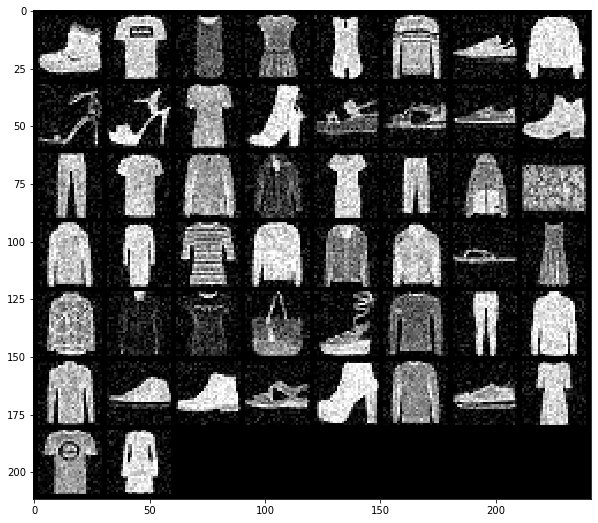

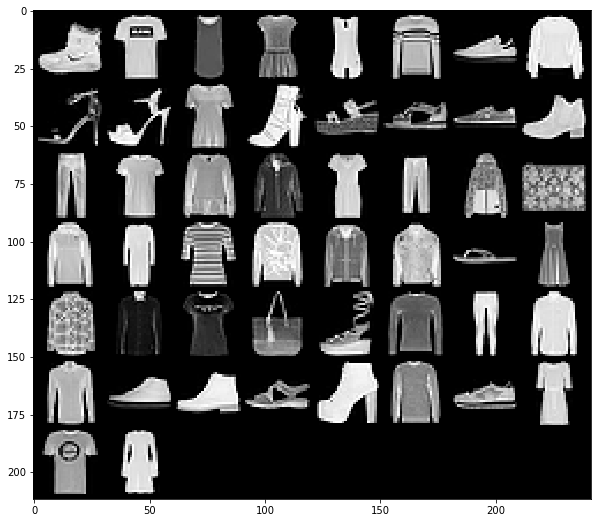

In [9]:
x = [train_dataset[i][0] for i in range(50)]
y = [train_dataset[i][1] for i in range(50)]

plt.figure(figsize=(10,10))
show(torchvision.utils.make_grid(x))
plt.show()

plt.figure(figsize=(10,10))
show(torchvision.utils.make_grid(y))
plt.show()

In [10]:
class Model(nn.Module):
    def __init__(self):
        super(Model, self).__init__()
        self.conv = nn.Conv2d(1, 16, 3, 1, 1)
        self.bn = nn.BatchNorm2d(16)
        
    def forward(self, x):
        x = self.conv(x)
        x = self.bn(x)
        x = F.relu(x)  
        x = F.log_softmax(x, dim=1)  
        return x


train_loader = torch.utils.data.DataLoader(train_dataset, batch_size=64)
test_loader = torch.utils.data.DataLoader(test_dataset, batch_size=64)


model = Model().to(device)
optimizer = torch.optim.SGD(model.parameters(), lr=0.001)
criterion = nn.KLDivLoss(reduction = 'batchmean')
# criterion = nn.CrossEntropyLoss()
# criterion = nn.functional.nll_loss()
scheduler = StepLR(optimizer, step_size=5, gamma=0.1)

for epoch in range(1,6):
    train(model, device, train_loader, optimizer, epoch)
    test(model, device, test_loader)
    scheduler.step()


Train Epoch: 1 [59520/60000 (99%)]	Loss: 9676.616211
Test set: Average loss: 134.3526, Accuracy: 52.7865/10000 (5279%)
Train Epoch: 2 [59520/60000 (99%)]	Loss: 9676.539062
Test set: Average loss: 134.3516, Accuracy: 54.6993/10000 (5470%)
Train Epoch: 3 [59520/60000 (99%)]	Loss: 9676.517578
Test set: Average loss: 134.3513, Accuracy: 57.8377/10000 (5784%)
Train Epoch: 4 [59520/60000 (99%)]	Loss: 9676.507812
Test set: Average loss: 134.3512, Accuracy: 60.4198/10000 (6042%)
Train Epoch: 5 [59520/60000 (99%)]	Loss: 9676.501953
Test set: Average loss: 134.3511, Accuracy: 62.8611/10000 (6286%)
